In [9]:
#data set
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_18440\265968353.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


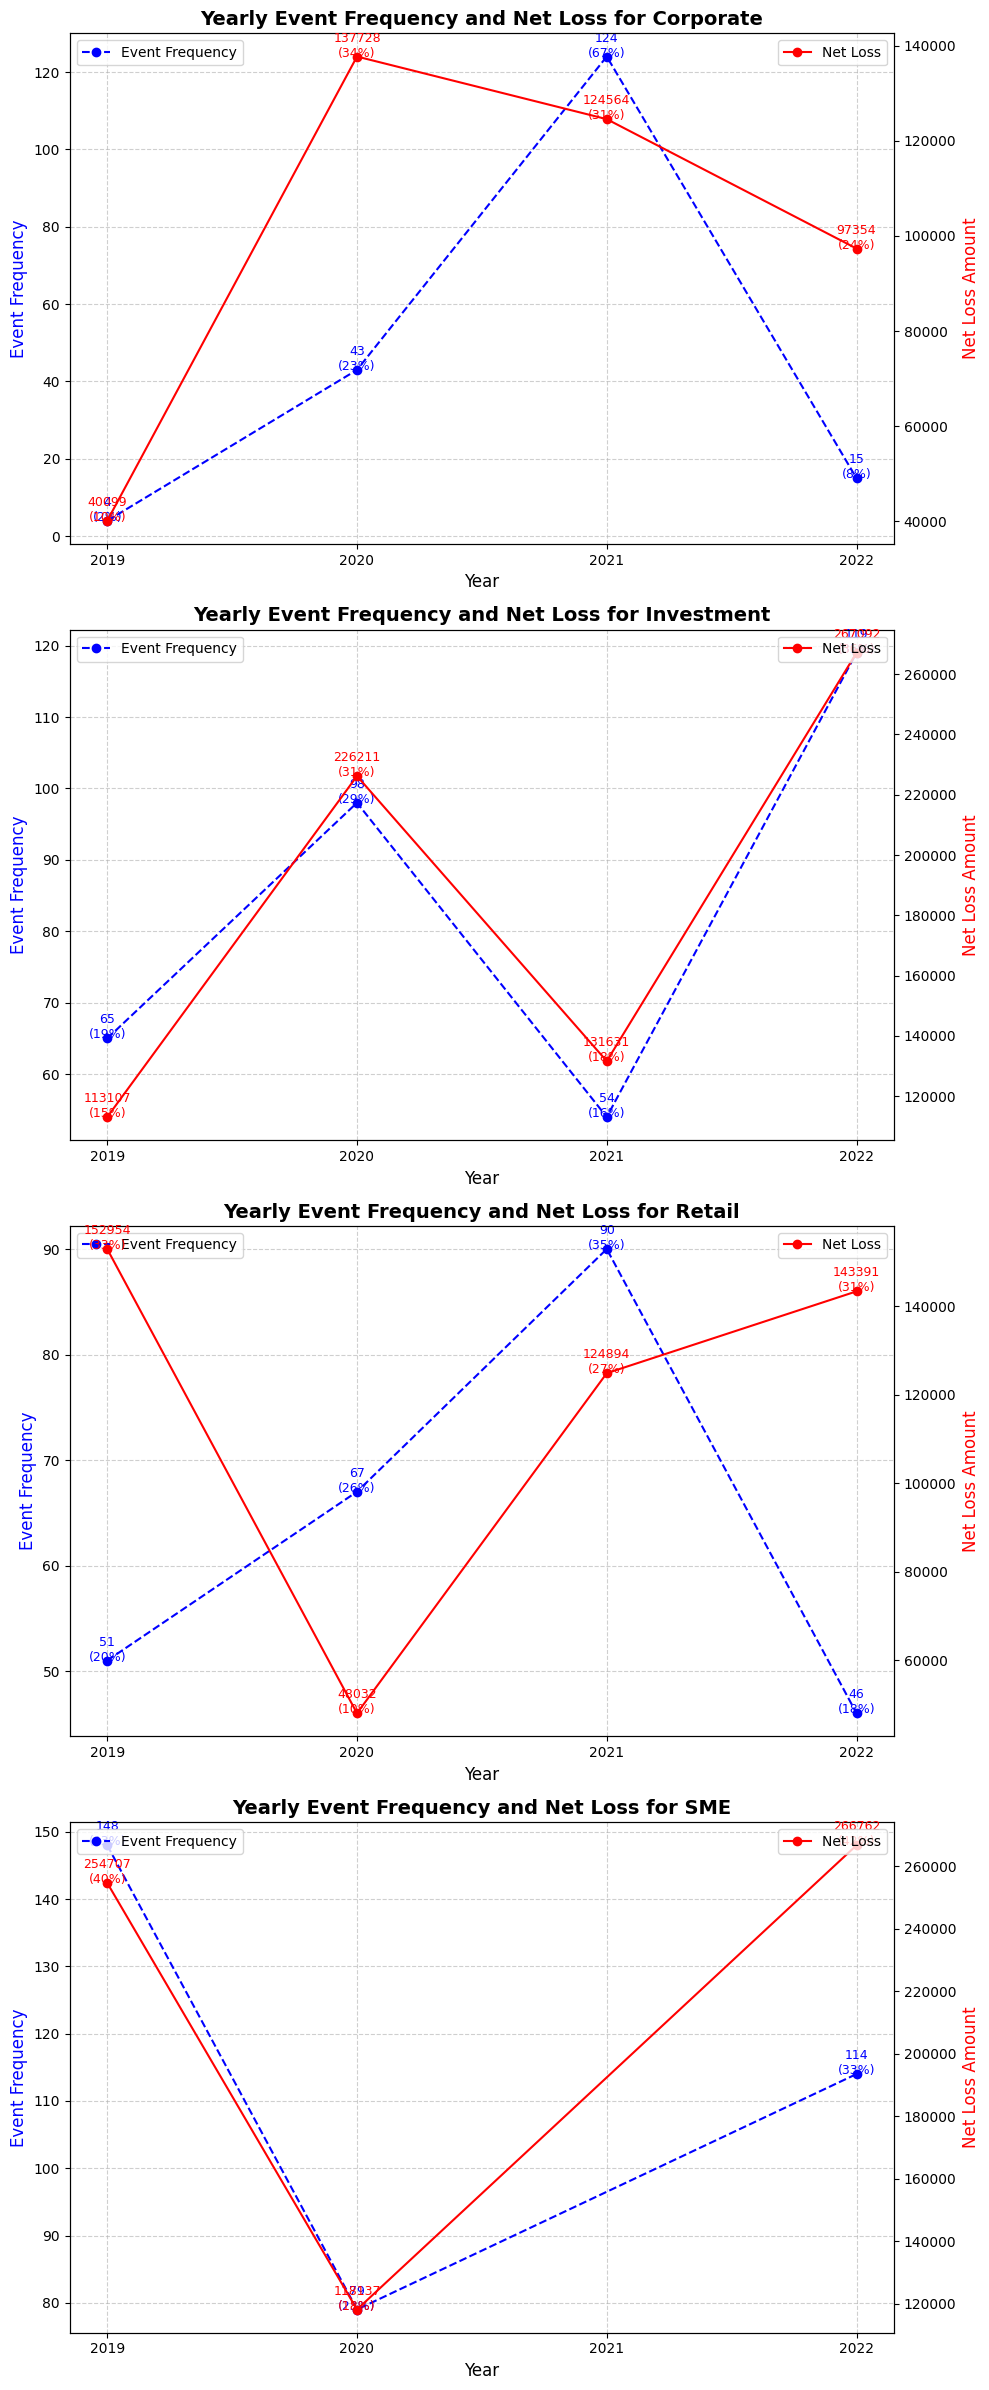

In [10]:
#Minmax scaling
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=48),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Business Line and Year, and aggregate totals
yearly_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
yearly_data[['Normalized Event Count', 'Normalized Net Loss Amount']] = scaler.fit_transform(
    yearly_data[['Event Count', 'Net Loss Amount']]
)

# Get unique business lines for creating subplots
business_lines = yearly_data['Business Line'].unique()
all_years = sorted(yearly_data['Year'].unique())  # Get all unique years

# Set up subplots
fig, axes = plt.subplots(len(business_lines), 1, figsize=(10, 6 * len(business_lines)))

# Iterate through each business line and plot
for idx, business_line in enumerate(business_lines):
    ax = axes[idx]
    data = yearly_data[yearly_data['Business Line'] == business_line]
    
    # Create a second Y-axis
    ax2 = ax.twinx()

    # Plot Event Frequency (left Y-axis)
    ax.plot(
        data['Year'], data['Event Count'], marker='o', label='Event Frequency', color='blue', linestyle='--'
    )
    for x, y in zip(data['Year'], data['Event Count']):
        ax.text(x, y, f"{y}\n({(y / data['Event Count'].sum()) * 100:.0f}%)", color='blue', fontsize=9, ha='center')

    # Plot Net Loss Amount (right Y-axis)
    ax2.plot(
        data['Year'], data['Net Loss Amount'], marker='o', label='Net Loss', color='red', linestyle='-'
    )
    for x, y in zip(data['Year'], data['Net Loss Amount']):
        ax2.text(x, y, f"{y:.0f}\n({(y / data['Net Loss Amount'].sum()) * 100:.0f}%)", color='red', fontsize=9, ha='center')

    # Set titles and labels
    ax.set_title(f"Yearly Event Frequency and Net Loss for {business_line}", fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Event Frequency', fontsize=12, color='blue')
    ax2.set_ylabel('Net Loss Amount', fontsize=12, color='red')

    # Set x-axis ticks
    ax.set_xticks(all_years)
    ax.set_xticklabels(all_years, fontsize=10)

    # Add legends
    ax.legend(fontsize=10, loc='upper left')
    ax2.legend(fontsize=10, loc='upper right')

    # Add grid lines for better readability
    ax.grid(axis='both', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()


In [14]:
# #Copy code
from IPython.core.display import display, HTML
display(HTML("<style>.output_scroll {height: 500px;}</style>"))
# You can adjust the height value to whatever size you prefer (e.g., 500px, 800px).

# For larger matplotlib plots: You can set the default size for plots directly.

# python
# Copy code
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # Set the figure size
# Adjust the values (12, 8) to your desired dimensions.

# For controlling the width of code cells: You can also modify the notebook's default layout using CSS like this:

# python
# Copy code
display(HTML("<style>.container { width: 100% !important; }</style>"))
# This will help expand the content and make better use of your screen real estate. You can modify the specific values as needed.

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_18440\2079651393.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_18440\279968737.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


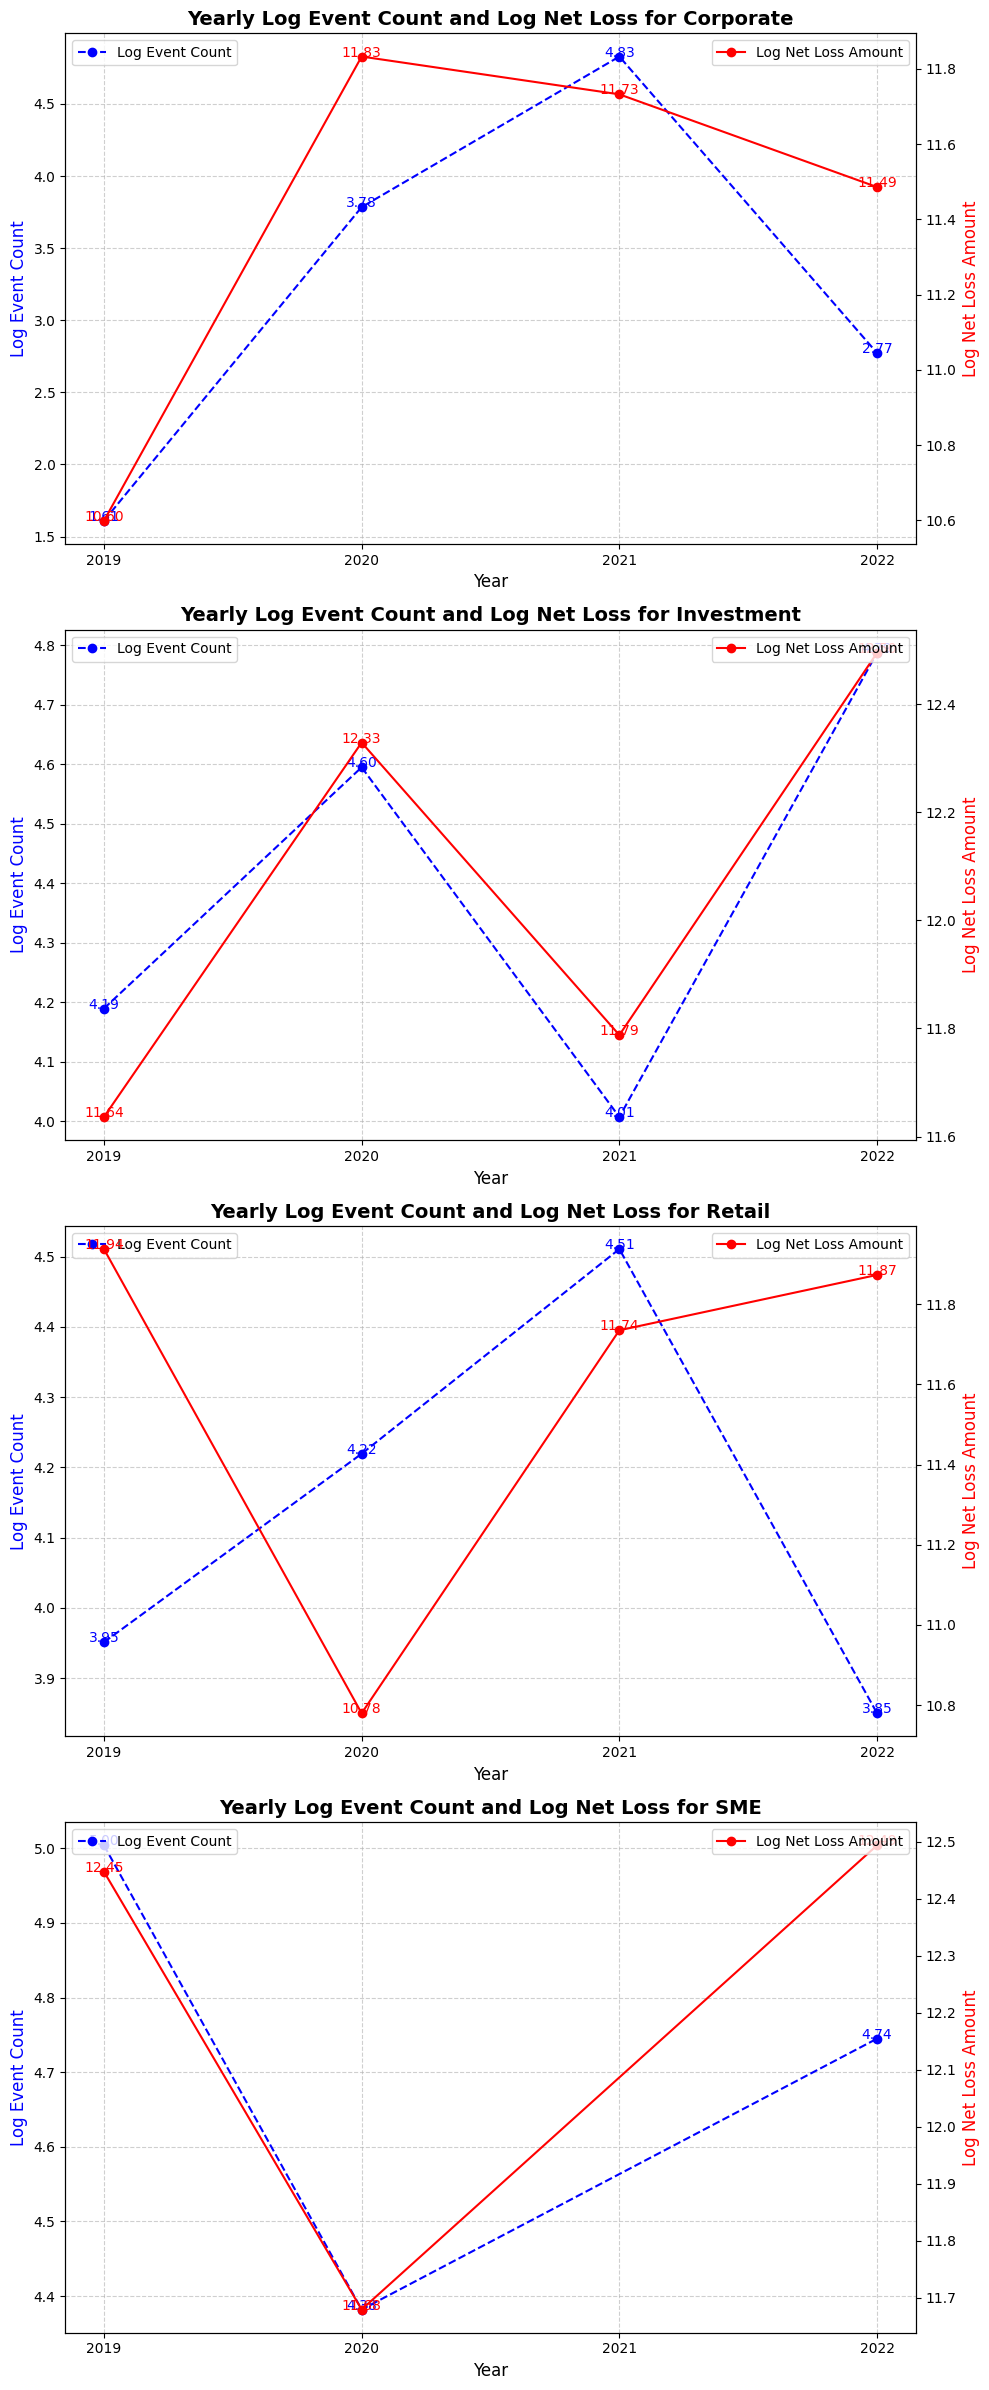

In [15]:
#Log naturaltransaformation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=48),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Business Line and Year, and aggregate totals
yearly_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Log Transformation for normalization
yearly_data['Log Event Count'] = np.log1p(yearly_data['Event Count'])
yearly_data['Log Net Loss Amount'] = np.log1p(yearly_data['Net Loss Amount'])

# Get unique business lines for creating subplots
business_lines = yearly_data['Business Line'].unique()
all_years = sorted(yearly_data['Year'].unique())  # Get all unique years

# Set up subplots
fig, axes = plt.subplots(len(business_lines), 1, figsize=(10, 6 * len(business_lines)))

# Iterate through each business line and plot
for idx, business_line in enumerate(business_lines):
    ax = axes[idx]
    data = yearly_data[yearly_data['Business Line'] == business_line]
    
    # Create a second y-axis
    ax2 = ax.twinx()

    # Plot Log Event Count on the left y-axis
    ax.plot(
        data['Year'], data['Log Event Count'], marker='o', label='Log Event Count', color='blue', linestyle='--'
    )
    for x, y in zip(data['Year'], data['Log Event Count']):
        ax.text(x, y, f"{y:.2f}", color='blue', fontsize=10, ha='center')

    # Plot Log Net Loss on the right y-axis
    ax2.plot(
        data['Year'], data['Log Net Loss Amount'], marker='o', label='Log Net Loss Amount', color='red', linestyle='-'
    )
    for x, y in zip(data['Year'], data['Log Net Loss Amount']):
        ax2.text(x, y, f"{y:.2f}", color='red', fontsize=10, ha='center')

    # Add titles and legends
    ax.set_title(f"Yearly Log Event Count and Log Net Loss for {business_line}", fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Log Event Count', fontsize=12, color='blue')
    ax2.set_ylabel('Log Net Loss Amount', fontsize=12, color='red')
    
    # Set x-axis ticks to be consistent across all subplots
    ax.set_xticks(all_years)
    ax.set_xticklabels(all_years, fontsize=10)
    
    # Set legends for both axes
    ax.legend(fontsize=10, loc='upper left')
    ax2.legend(fontsize=10, loc='upper right')

    # Add grid lines
    ax.grid(axis='both', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()  # Ensures proper spacing between plots
plt.show()


   Year  Event Count  Net Loss Amount  Log Event Count  Log Net Loss Amount  \
0  2019           39            24897         3.688879            10.122543   
1  2019           29            69148         3.401197            11.144019   
2  2019           15            24483         2.772589            10.105775   
3  2019           43            49555         3.784190            10.810859   
4  2019            8            18159         2.197225             9.806977   

   Robust Event Count  Robust Net Loss Amount  Z-Score Event Count  \
0            0.652632               -0.645343             1.098763   
1            0.231579                0.294158             0.360099   
2           -0.357895               -0.654133            -0.674031   
3            0.821053               -0.121825             1.394229   
4           -0.652632               -0.788399            -1.191096   

   Z-Score Net Loss Amount  
0                -1.057526  
1                 0.529644  
2                

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_18440\150993048.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


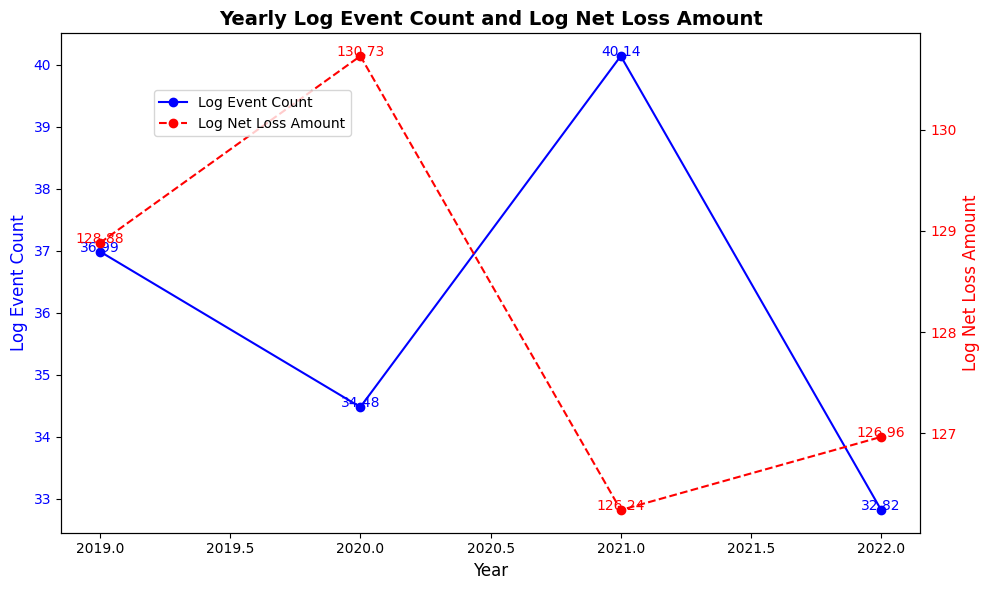

In [16]:
#log transaformation
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Log Transformation
df['Log Event Count'] = np.log1p(df['Event Count'])
df['Log Net Loss Amount'] = np.log1p(df['Net Loss Amount'])

# Robust Scaling
robust_scaler = RobustScaler()
df['Robust Event Count'] = robust_scaler.fit_transform(df[['Event Count']])
df['Robust Net Loss Amount'] = robust_scaler.fit_transform(df[['Net Loss Amount']])

# Z-Score Normalization (Standard Scaling)
z_scaler = StandardScaler()
df['Z-Score Event Count'] = z_scaler.fit_transform(df[['Event Count']])
df['Z-Score Net Loss Amount'] = z_scaler.fit_transform(df[['Net Loss Amount']])

# Display the DataFrame with normalized columns
print(df[['Year', 'Event Count', 'Net Loss Amount', 'Log Event Count', 
          'Log Net Loss Amount', 'Robust Event Count', 
          'Robust Net Loss Amount', 'Z-Score Event Count', 'Z-Score Net Loss Amount']].head())

# Plotting Log Transformed Data
import matplotlib.pyplot as plt

# Grouped Data
grouped = df.groupby('Year').agg({
    'Log Event Count': 'sum',
    'Log Net Loss Amount': 'sum'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Log Event Count on Y-axis 1
ax1.plot(grouped['Year'], grouped['Log Event Count'], color='blue', marker='o', label='Log Event Count')
ax1.set_ylabel('Log Event Count', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
for x, y in zip(grouped['Year'], grouped['Log Event Count']):
    ax1.text(x, y, f"{y:.2f}", color='blue', fontsize=10, ha='center')

# Plot Log Net Loss Amount on Y-axis 2
ax2 = ax1.twinx()
ax2.plot(grouped['Year'], grouped['Log Net Loss Amount'], color='red', marker='o', linestyle='--', label='Log Net Loss Amount')
ax2.set_ylabel('Log Net Loss Amount', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
for x, y in zip(grouped['Year'], grouped['Log Net Loss Amount']):
    ax2.text(x, y, f"{y:.2f}", color='red', fontsize=10, ha='center')

# Titles and Legends
plt.title('Yearly Log Event Count and Log Net Loss Amount', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_18440\2967030438.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


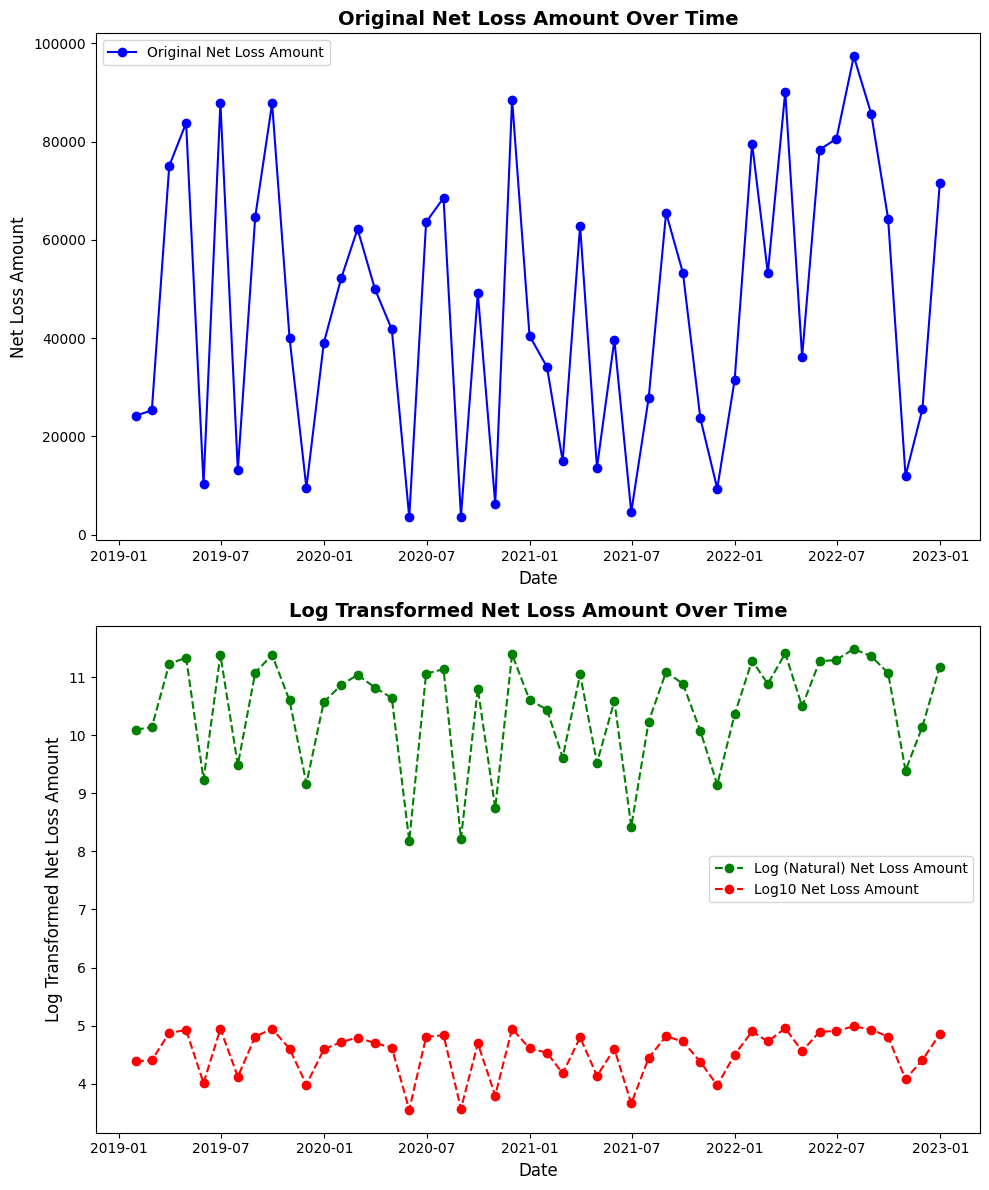

        Date  Net Loss Amount  Log_Net_Loss_Amount  Log10_Net_Loss_Amount
0 2019-01-31            24247            10.096089               4.384658
1 2019-02-28            25300            10.138599               4.403121
2 2019-03-31            75065            11.226123               4.875437
3 2019-04-30            83798            11.336176               4.923234
4 2019-05-31            10268             9.236885               4.011486


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=48),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Log Transformation: Apply Natural Log (ln) and Log Base 10 to Net Loss Amount
df['Log_Net_Loss_Amount'] = np.log1p(df['Net Loss Amount'])  # ln(x+1)
df['Log10_Net_Loss_Amount'] = np.log10(df['Net Loss Amount'])  # log10(x)

# Plotting the data
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plotting original Net Loss Amount
ax[0].plot(df['Date'], df['Net Loss Amount'], marker='o', label='Original Net Loss Amount', color='blue')
ax[0].set_title("Original Net Loss Amount Over Time", fontsize=14, fontweight='bold')
ax[0].set_xlabel("Date", fontsize=12)
ax[0].set_ylabel("Net Loss Amount", fontsize=12)
ax[0].legend()

# Plotting Log Transformed Data
ax[1].plot(df['Date'], df['Log_Net_Loss_Amount'], marker='o', label='Log (Natural) Net Loss Amount', color='green', linestyle='--')
ax[1].plot(df['Date'], df['Log10_Net_Loss_Amount'], marker='o', label='Log10 Net Loss Amount', color='red', linestyle='--')
ax[1].set_title("Log Transformed Net Loss Amount Over Time", fontsize=14, fontweight='bold')
ax[1].set_xlabel("Date", fontsize=12)
ax[1].set_ylabel("Log Transformed Net Loss Amount", fontsize=12)
ax[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Display first few rows to check the transformations
print(df[['Date', 'Net Loss Amount', 'Log_Net_Loss_Amount', 'Log10_Net_Loss_Amount']].head())


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_18440\2019202456.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


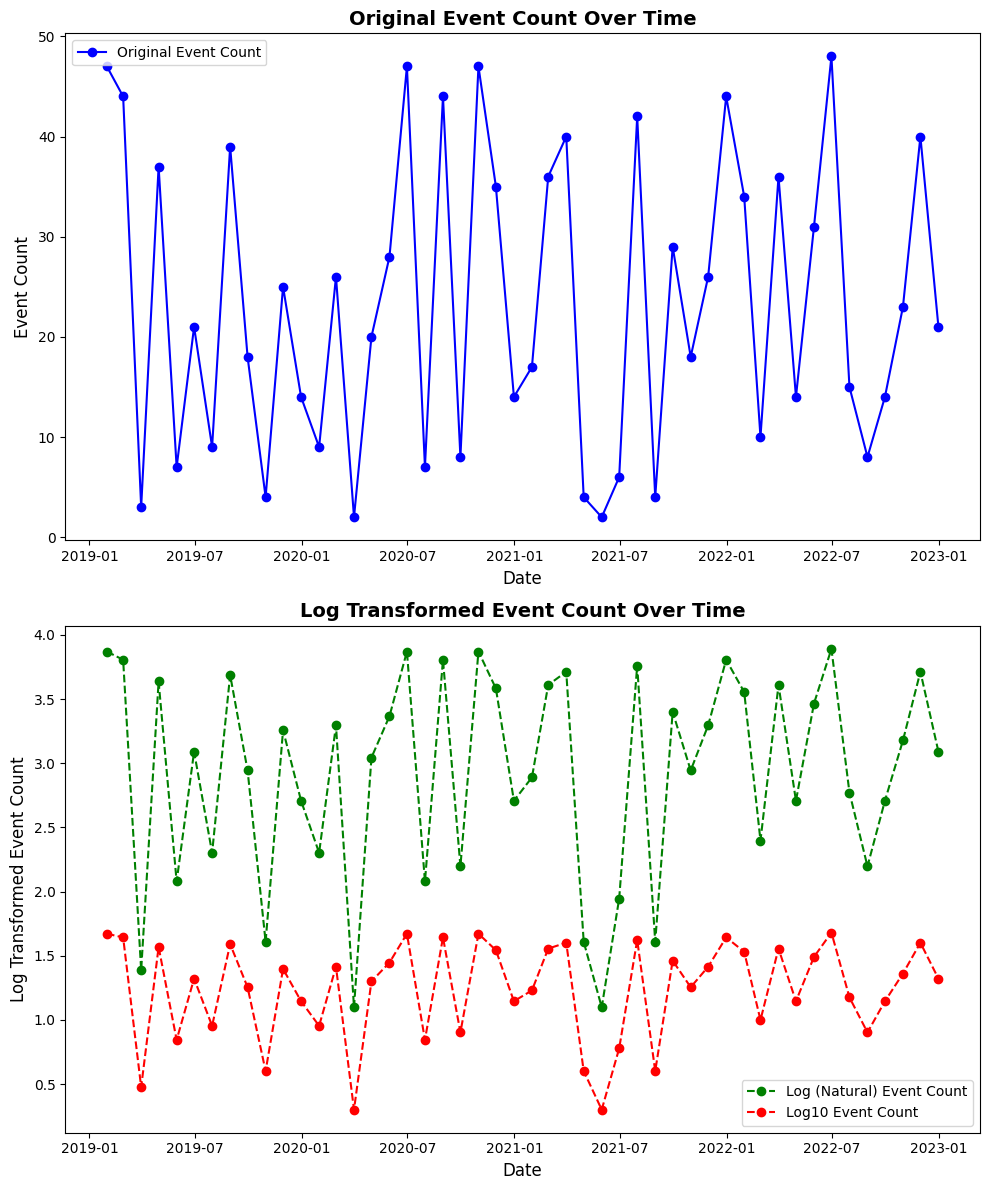

        Date  Event Count  Log_Event_Count  Log10_Event_Count
0 2019-01-31           47         3.871201           1.672098
1 2019-02-28           44         3.806662           1.643453
2 2019-03-31            3         1.386294           0.477121
3 2019-04-30           37         3.637586           1.568202
4 2019-05-31            7         2.079442           0.845098


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=48),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Log Transformation: Apply Natural Log (ln) and Log Base 10 to Event Count
df['Log_Event_Count'] = np.log1p(df['Event Count'])  # Natural Log (ln)
df['Log10_Event_Count'] = np.log10(df['Event Count'])  # Log Base 10

# Log Transformation for Net Loss Amount
df['Log_Net_Loss_Amount'] = np.log1p(df['Net Loss Amount'])  # ln(x+1)
df['Log10_Net_Loss_Amount'] = np.log10(df['Net Loss Amount'])  # log10(x)

# Plotting the data
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plotting original Event Count
ax[0].plot(df['Date'], df['Event Count'], marker='o', label='Original Event Count', color='blue')
ax[0].set_title("Original Event Count Over Time", fontsize=14, fontweight='bold')
ax[0].set_xlabel("Date", fontsize=12)
ax[0].set_ylabel("Event Count", fontsize=12)
ax[0].legend()

# Plotting Log Transformed Event Count
ax[1].plot(df['Date'], df['Log_Event_Count'], marker='o', label='Log (Natural) Event Count', color='green', linestyle='--')
ax[1].plot(df['Date'], df['Log10_Event_Count'], marker='o', label='Log10 Event Count', color='red', linestyle='--')
ax[1].set_title("Log Transformed Event Count Over Time", fontsize=14, fontweight='bold')
ax[1].set_xlabel("Date", fontsize=12)
ax[1].set_ylabel("Log Transformed Event Count", fontsize=12)
ax[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Display first few rows to check the transformations
print(df[['Date', 'Event Count', 'Log_Event_Count', 'Log10_Event_Count']].head())


In [19]:
Operational Risk Dataset Analysis
Introduction
This document provides an analysis of a dataset created to simulate operational risk events in the financial industry. The dataset consists of 10,000 records, with each record representing a unique operational risk event categorized by date, event type, business line, event description, and financial impact (net loss amount). The purpose of this analysis is to gain insights into the frequency, distribution, and impact of operational risk events across various business lines and event types.
Dataset Overview
The dataset consists of the following columns:
1. **Date**: The date when the event occurred.
2. **Unique Event ID**: A unique identifier for each event.
3. **Event Type**: The type of the event (e.g., Fraud, System Failure, etc.).
4. **Business Line**: The business line affected by the event (e.g., Retail, Investment Banking, etc.).
5. **Event Description**: A brief description of the event (e.g., Unauthorized transaction, Data breach, etc.).
6. **Net Loss Amount**: The financial impact of the event, which could be positive or negative.
Analysis
The following analysis can be performed on the dataset:
1. **Event Type Analysis**: Frequency analysis by event type over time (monthly, quarterly, yearly).
2. **Loss Distribution Analysis**: Examining the distribution of net loss amounts and identifying significant events or outliers.
3. **Business Line Impact**: Comparing the net loss amounts across different business lines.
4. **Text Analysis**: Applying NLP techniques on the 'Event Description' column to extract additional insights, such as clustering or topic modeling.

Methods for Analysis
To perform the analysis, the following steps can be taken:
1. **Data Cleaning**: Ensure there are no missing values or inconsistencies in the dataset.
2. **Exploratory Data Analysis (EDA)**: Use visualizations like bar charts, histograms, and time series plots to explore the dataset.
3. **Statistical Analysis**: Apply statistical methods like distribution fitting and hypothesis testing to understand trends and patterns.
4. **Text Mining**: Apply Natural Language Processing (NLP) techniques such as sentiment analysis or topic modeling on the 'Event Description' column.

Conclusion
This analysis aims to provide valuable insights into the operational risk landscape within the financial industry. By analyzing event types, loss distribution, and business line impact, organizations can better understand the risk factors affecting their operations and make data-driven decisions to mitigate risks.
Notes
1. The dataset is randomly generated and should be used for illustrative purposes only.
2. The financial impact (Net Loss Amount) can be both positive and negative, indicating both gains and losses due to operational risk events.
3. Further analysis could include forecasting future risk events based on historical patterns.


SyntaxError: invalid syntax (239877315.py, line 1)

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_18440\1992562746.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


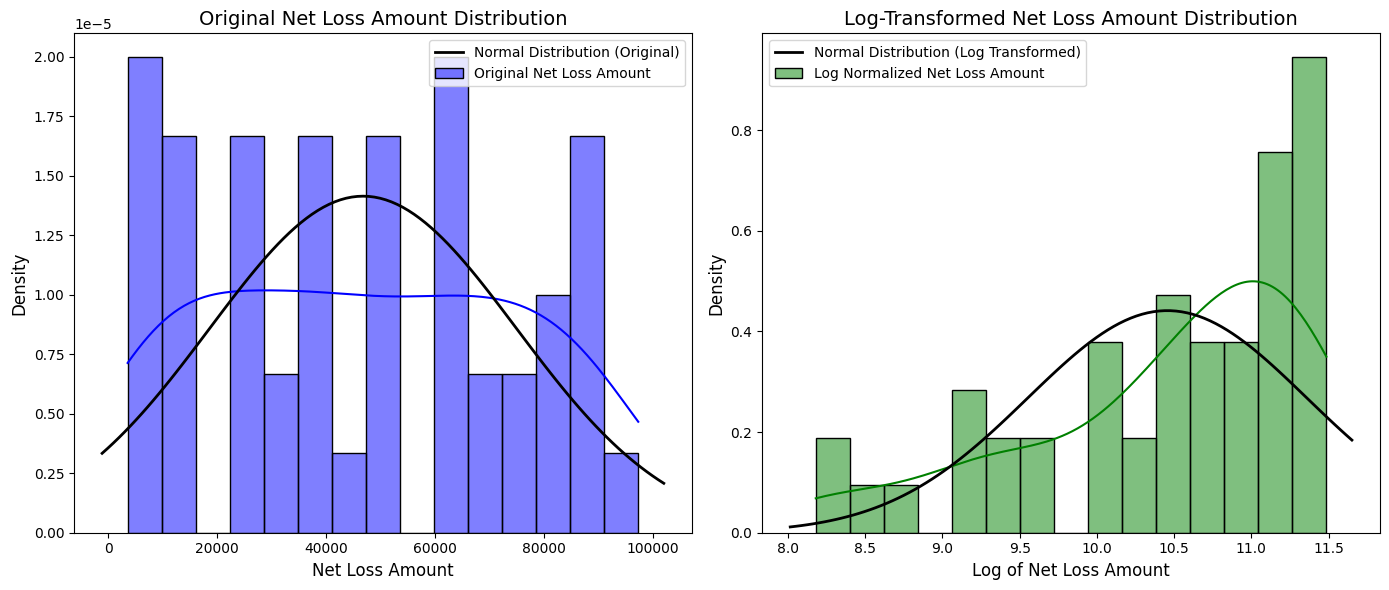

        Date  Net Loss Amount  Log_Net_Loss_Amount
0 2019-01-31            24247            10.096089
1 2019-02-28            25300            10.138599
2 2019-03-31            75065            11.226123
3 2019-04-30            83798            11.336176
4 2019-05-31            10268             9.236885


In [20]:
#before and after normailiation netloss amount
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=48),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Log Transformation: Apply Natural Log (ln) to Net Loss Amount
df['Log_Net_Loss_Amount'] = np.log1p(df['Net Loss Amount'])  # log1p(x) for ln(x+1)

# Set up subplots for original and normalized (log-transformed) Net Loss Amount
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for original Net Loss Amount
sns.histplot(df['Net Loss Amount'], kde=True, ax=axes[0], color='blue', stat='density', bins=15, label='Original Net Loss Amount')
# Overlay normal distribution curve for the original data
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(df['Net Loss Amount']), np.std(df['Net Loss Amount']))
axes[0].plot(x, p, 'k', linewidth=2, label='Normal Distribution (Original)')
axes[0].set_title("Original Net Loss Amount Distribution", fontsize=14)
axes[0].set_xlabel("Net Loss Amount", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].legend()

# Plot histogram for log-transformed Net Loss Amount
sns.histplot(df['Log_Net_Loss_Amount'], kde=True, ax=axes[1], color='green', stat='density', bins=15, label='Log Normalized Net Loss Amount')
# Overlay normal distribution curve for the log-transformed data
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(df['Log_Net_Loss_Amount']), np.std(df['Log_Net_Loss_Amount']))
axes[1].plot(x, p, 'k', linewidth=2, label='Normal Distribution (Log Transformed)')
axes[1].set_title("Log-Transformed Net Loss Amount Distribution", fontsize=14)
axes[1].set_xlabel("Log of Net Loss Amount", fontsize=12)
axes[1].set_ylabel("Density", fontsize=12)
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Optionally, display first few rows for inspection
print(df[['Date', 'Net Loss Amount', 'Log_Net_Loss_Amount']].head())


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_18440\2084519741.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


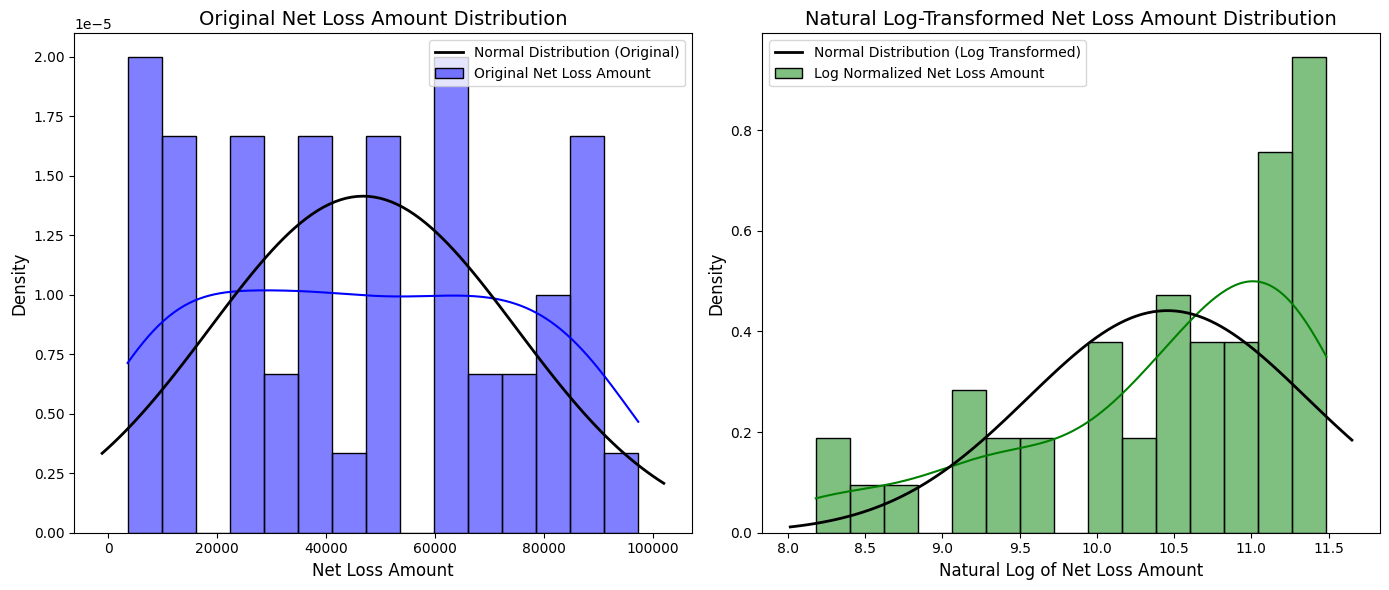

        Date  Net Loss Amount  Natural_Log_Net_Loss_Amount
0 2019-01-31            24247                    10.096048
1 2019-02-28            25300                    10.138560
2 2019-03-31            75065                    11.226110
3 2019-04-30            83798                    11.336164
4 2019-05-31            10268                     9.236788


In [21]:
#natural
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=48),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Natural Log Transformation: Apply Natural Log (ln) to Net Loss Amount
df['Natural_Log_Net_Loss_Amount'] = np.log(df['Net Loss Amount'])  # ln(x)

# Set up subplots for original and normalized (log-transformed) Net Loss Amount
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for original Net Loss Amount
sns.histplot(df['Net Loss Amount'], kde=True, ax=axes[0], color='blue', stat='density', bins=15, label='Original Net Loss Amount')
# Overlay normal distribution curve for the original data
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(df['Net Loss Amount']), np.std(df['Net Loss Amount']))
axes[0].plot(x, p, 'k', linewidth=2, label='Normal Distribution (Original)')
axes[0].set_title("Original Net Loss Amount Distribution", fontsize=14)
axes[0].set_xlabel("Net Loss Amount", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].legend()

# Plot histogram for natural log-transformed Net Loss Amount
sns.histplot(df['Natural_Log_Net_Loss_Amount'], kde=True, ax=axes[1], color='green', stat='density', bins=15, label='Log Normalized Net Loss Amount')
# Overlay normal distribution curve for the log-transformed data
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(df['Natural_Log_Net_Loss_Amount']), np.std(df['Natural_Log_Net_Loss_Amount']))
axes[1].plot(x, p, 'k', linewidth=2, label='Normal Distribution (Log Transformed)')
axes[1].set_title("Natural Log-Transformed Net Loss Amount Distribution", fontsize=14)
axes[1].set_xlabel("Natural Log of Net Loss Amount", fontsize=12)
axes[1].set_ylabel("Density", fontsize=12)
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Optionally, display first few rows for inspection
print(df[['Date', 'Net Loss Amount', 'Natural_Log_Net_Loss_Amount']].head())



# Explanation of the Code:
# Data Preparation:

# df['Net Loss Amount']: The original Net Loss data.
# df['Log_Net_Loss_Amount']: The log-transformed Net Loss data using np.log1p(), which applies the natural log transformation (ln(x + 1)).
# Plotting:

# We use sns.histplot() to plot histograms for both the original and log-transformed data with the Kernel Density Estimate (KDE) overlaid to show the density curve.
# For both histograms, the Normal Distribution Curve is overlaid using norm.pdf(), which generates the probability density function for a normal distribution based on the mean and standard deviation of the respective datasets.
# Legends and Titles:

# Legends and titles are added for clarity, differentiating between the original and normalized datasets and their respective normal distribution curves.
# What to Expect:
# The left plot will show the histogram and the normal distribution curve for the original Net Loss Amount.
# The right plot will show the histogram and the normal distribution curve for the log-transformed Net Loss Amount, which should be closer to a normal distribution.


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_18440\711437591.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


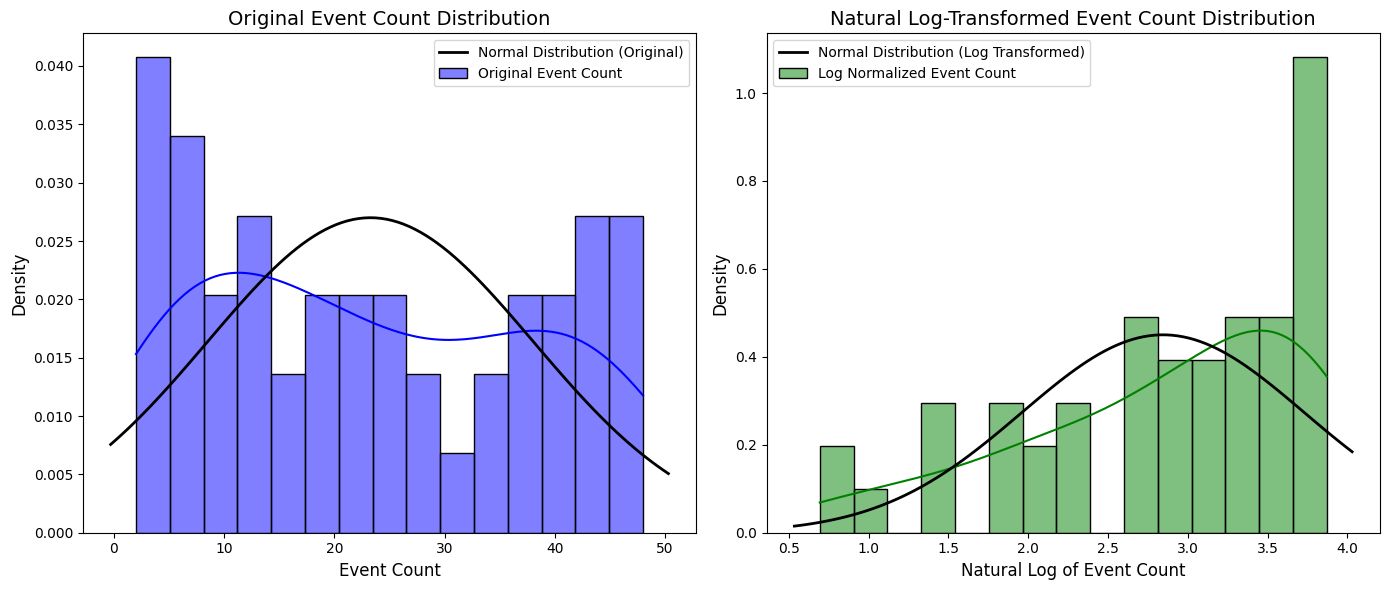

        Date  Event Count  Natural_Log_Event_Count
0 2019-01-31           47                 3.850148
1 2019-02-28           44                 3.784190
2 2019-03-31            3                 1.098612
3 2019-04-30           37                 3.610918
4 2019-05-31            7                 1.945910


In [22]:
#event count log transaformation natural
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=48),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Natural Log Transformation: Apply Natural Log (ln) to Event Count
df['Natural_Log_Event_Count'] = np.log(df['Event Count'])  # ln(x)

# Set up subplots for original and normalized (log-transformed) Event Count
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for original Event Count
sns.histplot(df['Event Count'], kde=True, ax=axes[0], color='blue', stat='density', bins=15, label='Original Event Count')
# Overlay normal distribution curve for the original data
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(df['Event Count']), np.std(df['Event Count']))
axes[0].plot(x, p, 'k', linewidth=2, label='Normal Distribution (Original)')
axes[0].set_title("Original Event Count Distribution", fontsize=14)
axes[0].set_xlabel("Event Count", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].legend()

# Plot histogram for natural log-transformed Event Count
sns.histplot(df['Natural_Log_Event_Count'], kde=True, ax=axes[1], color='green', stat='density', bins=15, label='Log Normalized Event Count')
# Overlay normal distribution curve for the log-transformed data
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(df['Natural_Log_Event_Count']), np.std(df['Natural_Log_Event_Count']))
axes[1].plot(x, p, 'k', linewidth=2, label='Normal Distribution (Log Transformed)')
axes[1].set_title("Natural Log-Transformed Event Count Distribution", fontsize=14)
axes[1].set_xlabel("Natural Log of Event Count", fontsize=12)
axes[1].set_ylabel("Density", fontsize=12)
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Optionally, display first few rows for inspection
print(df[['Date', 'Event Count', 'Natural_Log_Event_Count']].head())


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\1257901603.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


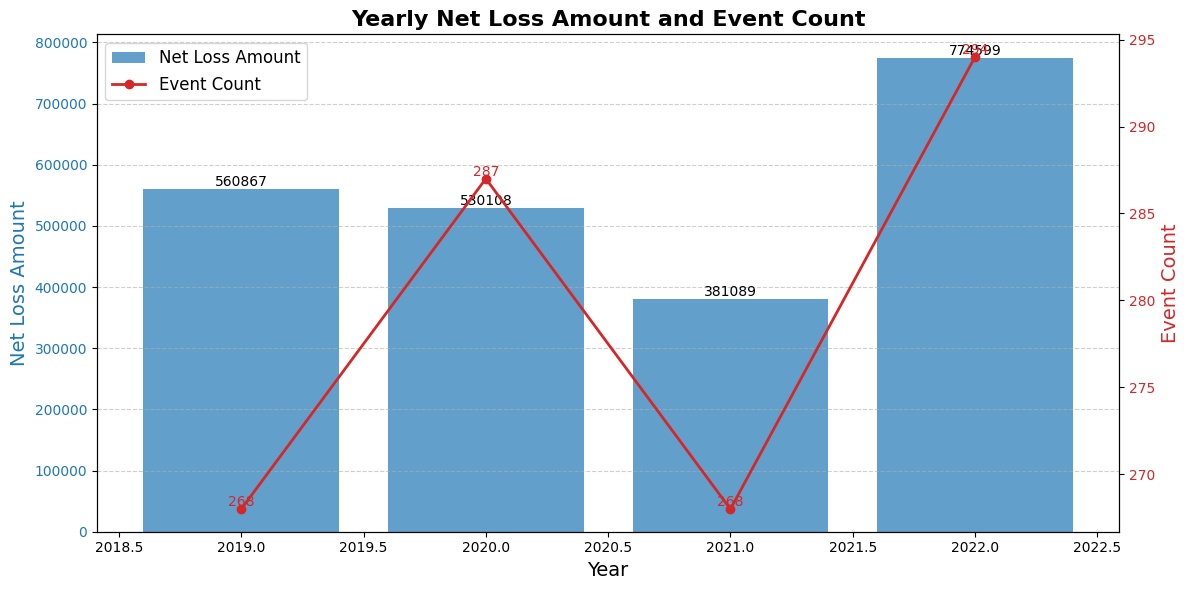

In [12]:
#only value on bar chart not line chart
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=48),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and calculate total Net Loss and Event Count
yearly_data = df.groupby('Year').agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Net Loss on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Net Loss Amount', color=color, fontsize=14)
bars = ax1.bar(
    yearly_data['Year'], 
    yearly_data['Net Loss Amount'], 
    color=color, 
    alpha=0.7, 
    label='Net Loss Amount'
)
# Add data labels to the bars
for bar, value in zip(bars, yearly_data['Net Loss Amount']):
    ax1.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f'{value:.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Event Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Event Count', color=color, fontsize=14)
line = ax2.plot(
    yearly_data['Year'], 
    yearly_data['Event Count'], 
    color=color, 
    marker='o', 
    linewidth=2, 
    label='Event Count'
)
# Add data labels to the line chart
for x, y in zip(yearly_data['Year'], yearly_data['Event Count']):
    ax2.text(x, y, f'{y}', color=color, fontsize=10, ha='center', va='bottom')
ax2.tick_params(axis='y', labelcolor=color)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

# Add gridlines
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Add a title
plt.title('Yearly Net Loss Amount and Event Count', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\3330172675.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


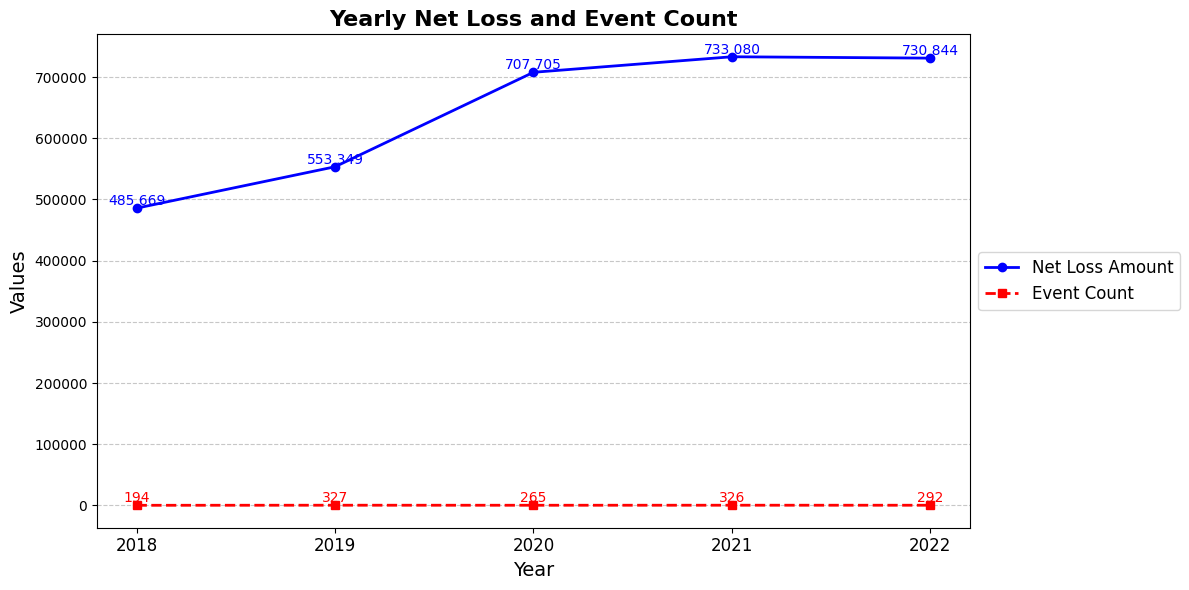

In [13]:
#only value but line chart for both
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=60),
    'Event Count': np.random.randint(1, 50, size=60),
    'Net Loss Amount': np.random.randint(1000, 100000, size=60)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and calculate total Net Loss and Event Count
yearly_data = df.groupby('Year').agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Net Loss Amount
plt.plot(
    yearly_data['Year'], 
    yearly_data['Net Loss Amount'], 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    label='Net Loss Amount', 
    color='blue'
)

# Plot Event Count
plt.plot(
    yearly_data['Year'], 
    yearly_data['Event Count'], 
    marker='s', 
    linestyle='--', 
    linewidth=2, 
    label='Event Count', 
    color='red'
)

# Add labels to data points for both lines
for x, y in zip(yearly_data['Year'], yearly_data['Net Loss Amount']):
    plt.text(x, y, f'{y:,}', color='blue', fontsize=10, ha='center', va='bottom')

for x, y in zip(yearly_data['Year'], yearly_data['Event Count']):
    plt.text(x, y, f'{y}', color='red', fontsize=10, ha='center', va='bottom')

# Customize the x-axis
plt.xticks(yearly_data['Year'], fontsize=12)  # Ensure proper year labels
plt.xlabel('Year', fontsize=14)

# Add labels for the y-axis
plt.ylabel('Values', fontsize=14)

# Add a title
plt.title('Yearly Net Loss and Event Count', fontsize=16, fontweight='bold')

# Add a legend to the right side of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit the legend
plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\1194291414.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


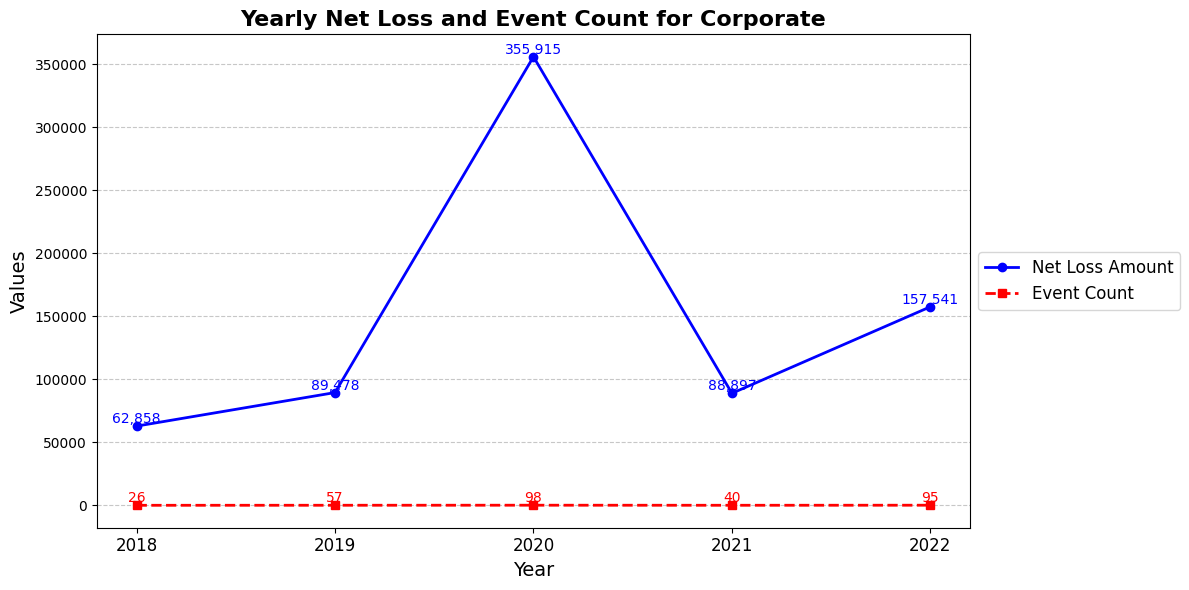

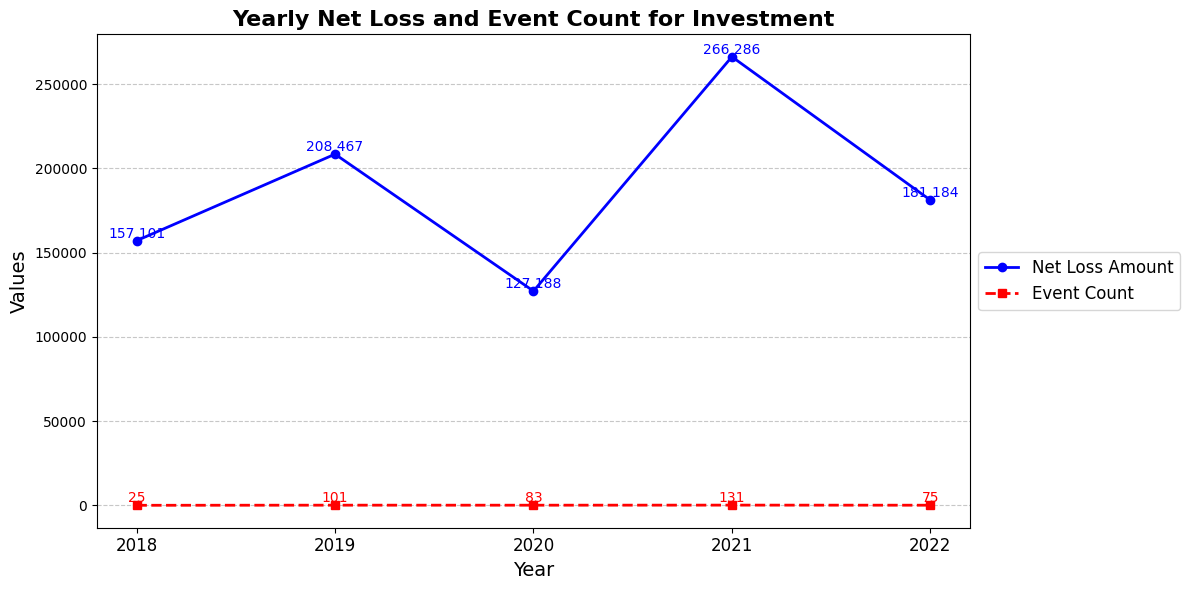

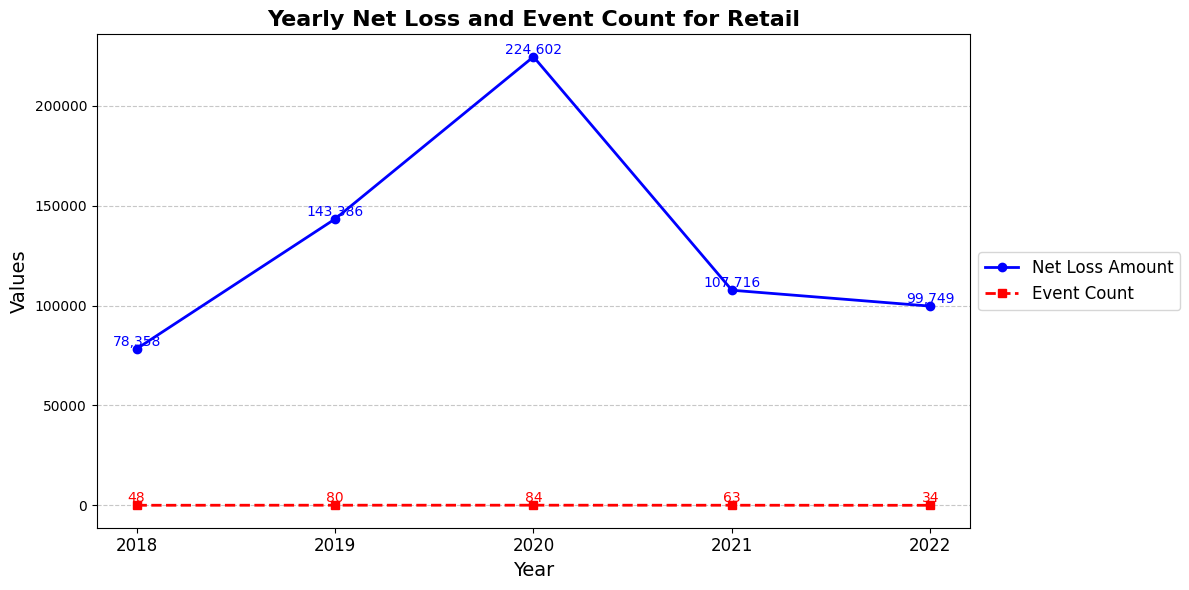

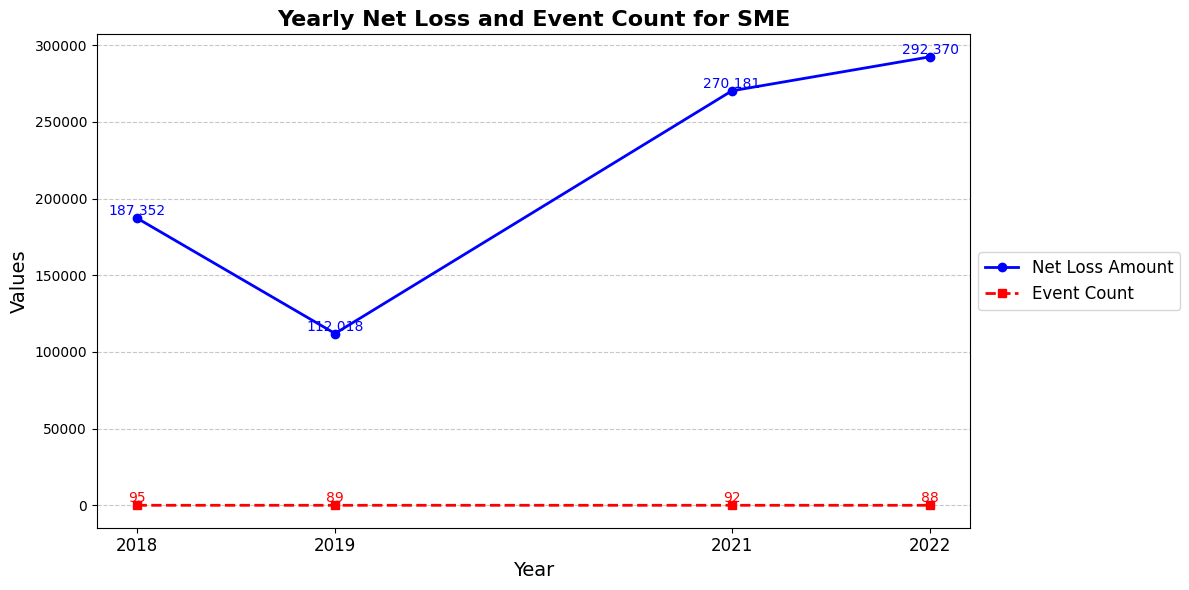

In [14]:
#only value line chart for both and all bisoness line
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=60),
    'Event Count': np.random.randint(1, 50, size=60),
    'Net Loss Amount': np.random.randint(1000, 100000, size=60)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and Business Line to calculate total Net Loss and Event Count
grouped_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Unique Business Lines
business_lines = grouped_data['Business Line'].unique()

# Plotting for each Business Line
for business_line in business_lines:
    # Filter data for the current Business Line
    line_data = grouped_data[grouped_data['Business Line'] == business_line]
    
    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot Net Loss Amount
    plt.plot(
        line_data['Year'],
        line_data['Net Loss Amount'],
        marker='o',
        linestyle='-',
        linewidth=2,
        label='Net Loss Amount',
        color='blue'
    )

    # Plot Event Count
    plt.plot(
        line_data['Year'],
        line_data['Event Count'],
        marker='s',
        linestyle='--',
        linewidth=2,
        label='Event Count',
        color='red'
    )

    # Add labels to data points for both lines
    for x, y in zip(line_data['Year'], line_data['Net Loss Amount']):
        plt.text(x, y, f'{y:,}', color='blue', fontsize=10, ha='center', va='bottom')

    for x, y in zip(line_data['Year'], line_data['Event Count']):
        plt.text(x, y, f'{y}', color='red', fontsize=10, ha='center', va='bottom')

    # Customize the x-axis
    plt.xticks(line_data['Year'], fontsize=12)  # Ensure proper year labels
    plt.xlabel('Year', fontsize=14)

    # Add labels for the y-axis
    plt.ylabel('Values', fontsize=14)

    # Add a title
    plt.title(f'Yearly Net Loss and Event Count for {business_line}', fontsize=16, fontweight='bold')

    # Add a legend to the right side of the graph
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to fit the legend
    plt.tight_layout()
    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\3314955238.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


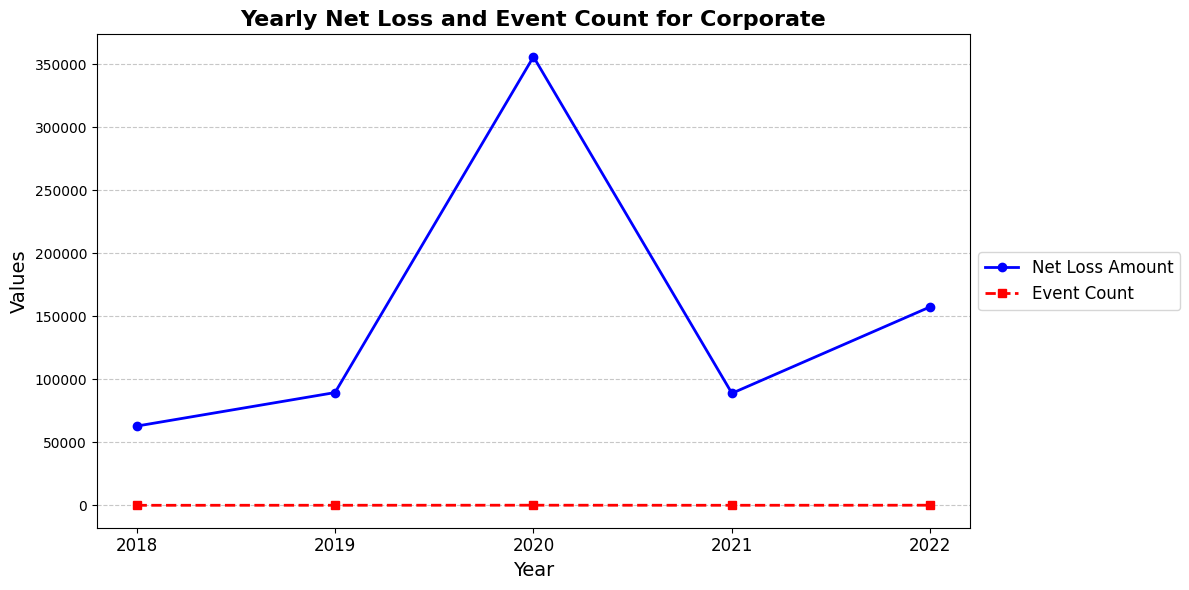

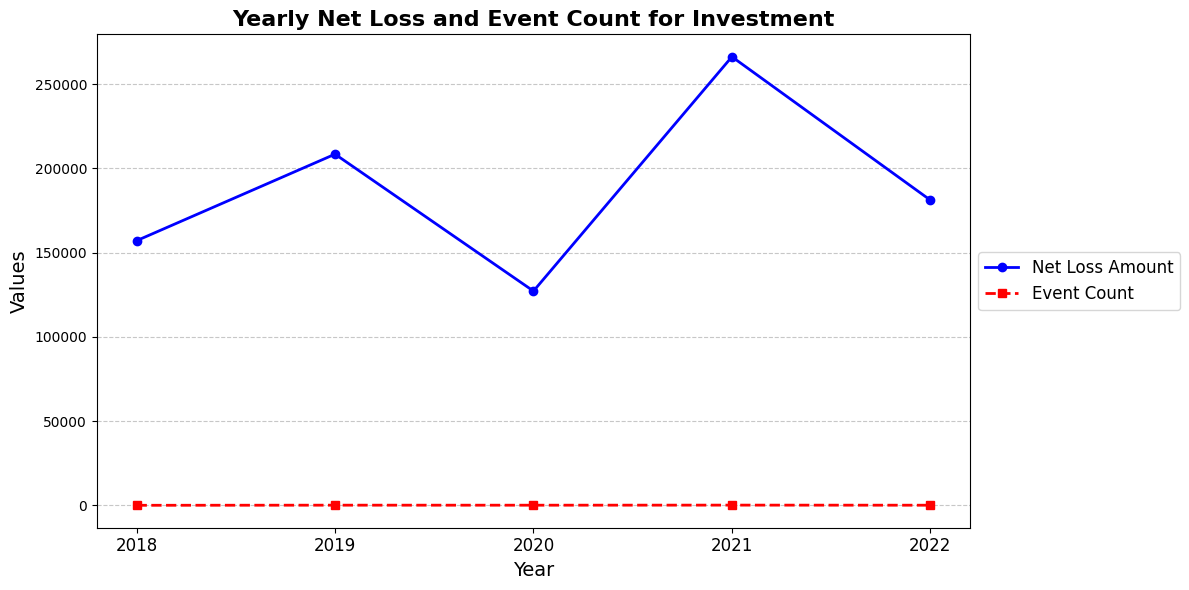

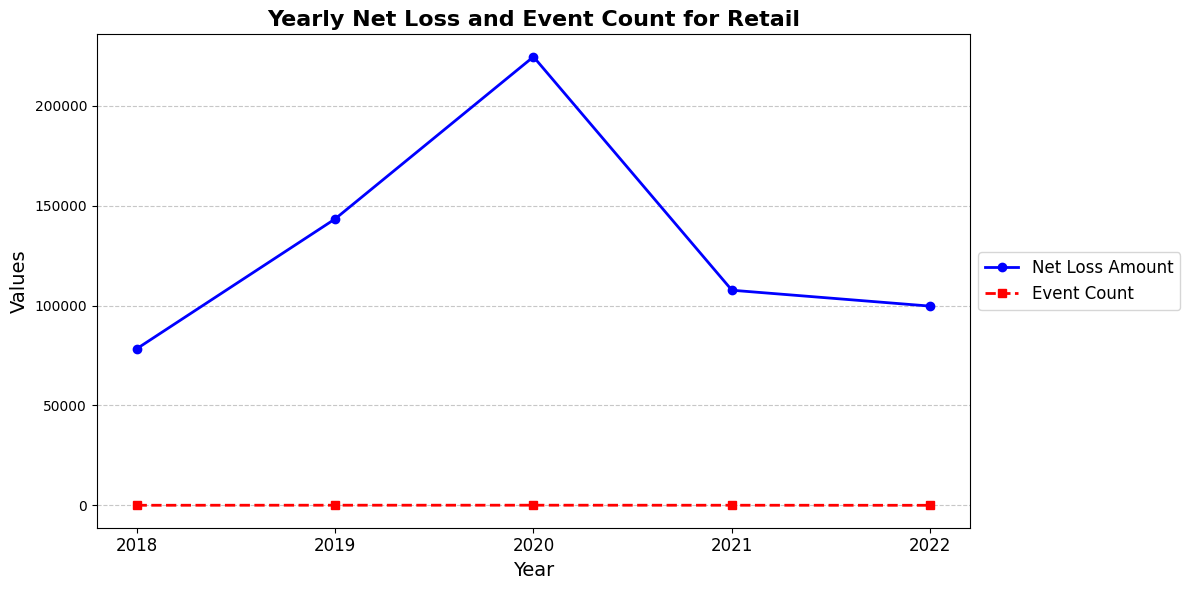

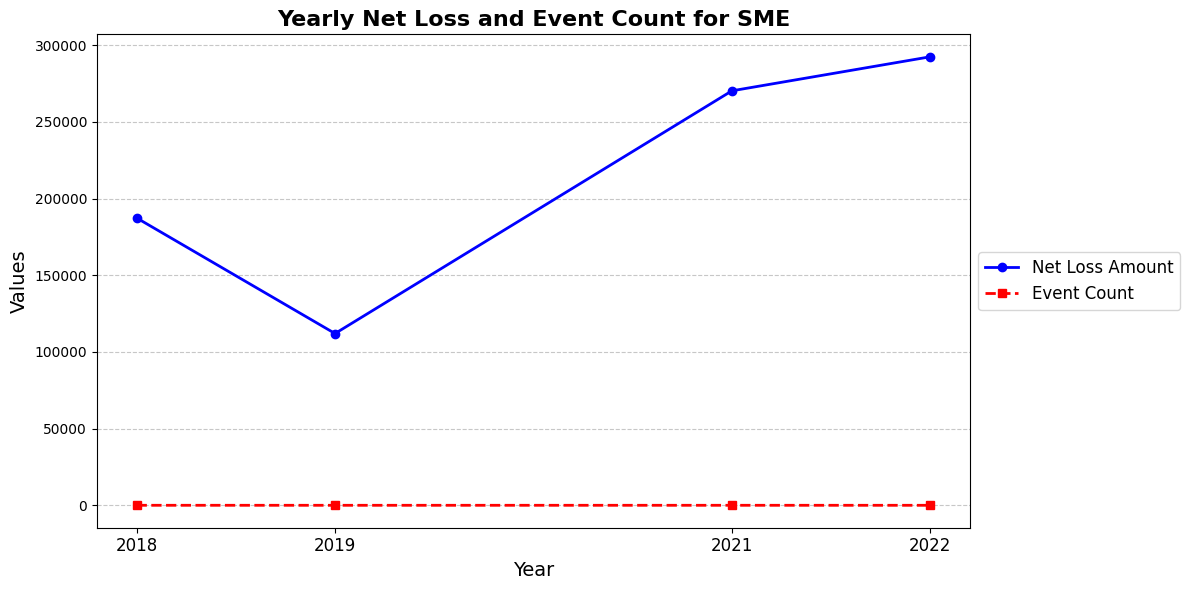

In [15]:
#all business line without label value and per but line chart
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=60),
    'Event Count': np.random.randint(1, 50, size=60),
    'Net Loss Amount': np.random.randint(1000, 100000, size=60)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and Business Line to calculate total Net Loss and Event Count
grouped_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Unique Business Lines
business_lines = grouped_data['Business Line'].unique()

# Plotting for each Business Line
for business_line in business_lines:
    # Filter data for the current Business Line
    line_data = grouped_data[grouped_data['Business Line'] == business_line]
    
    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot Net Loss Amount
    plt.plot(
        line_data['Year'],
        line_data['Net Loss Amount'],
        marker='o',
        linestyle='-',
        linewidth=2,
        label='Net Loss Amount',
        color='blue'
    )

    # Plot Event Count
    plt.plot(
        line_data['Year'],
        line_data['Event Count'],
        marker='s',
        linestyle='--',
        linewidth=2,
        label='Event Count',
        color='red'
    )

    # Customize the x-axis
    plt.xticks(line_data['Year'], fontsize=12)  # Ensure proper year labels
    plt.xlabel('Year', fontsize=14)

    # Add labels for the y-axis
    plt.ylabel('Values', fontsize=14)

    # Add a title
    plt.title(f'Yearly Net Loss and Event Count for {business_line}', fontsize=16, fontweight='bold')

    # Add a legend to the right side of the graph
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to fit the legend
    plt.tight_layout()
    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\2944650361.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


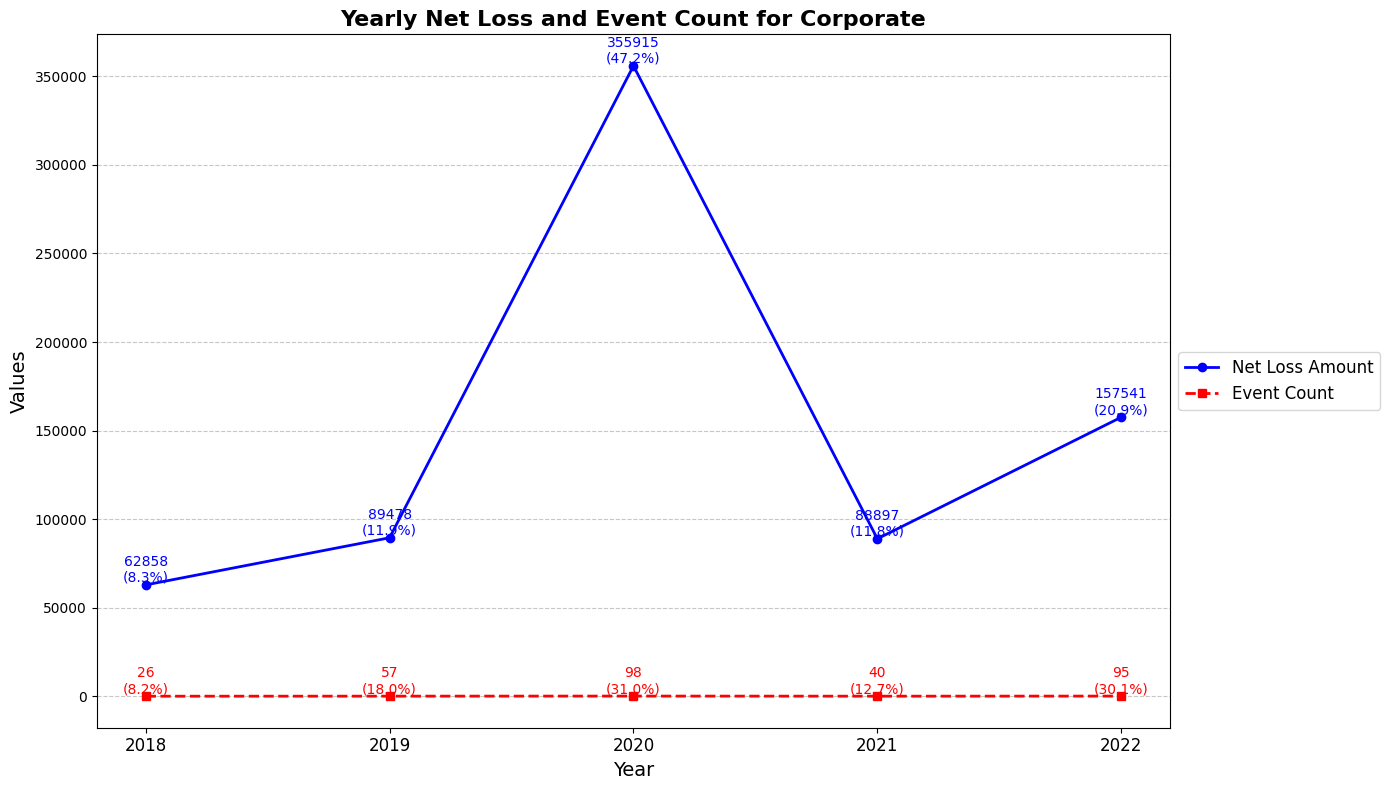

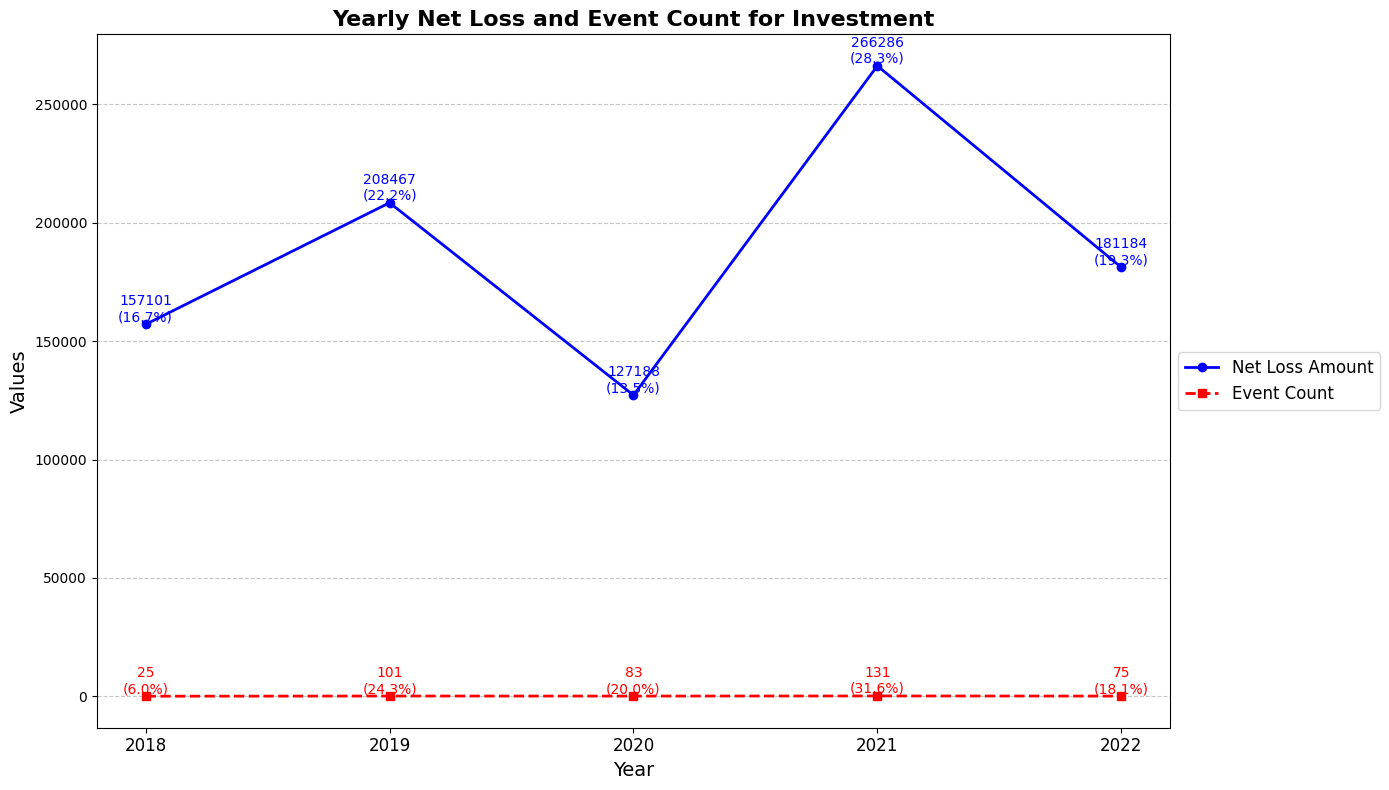

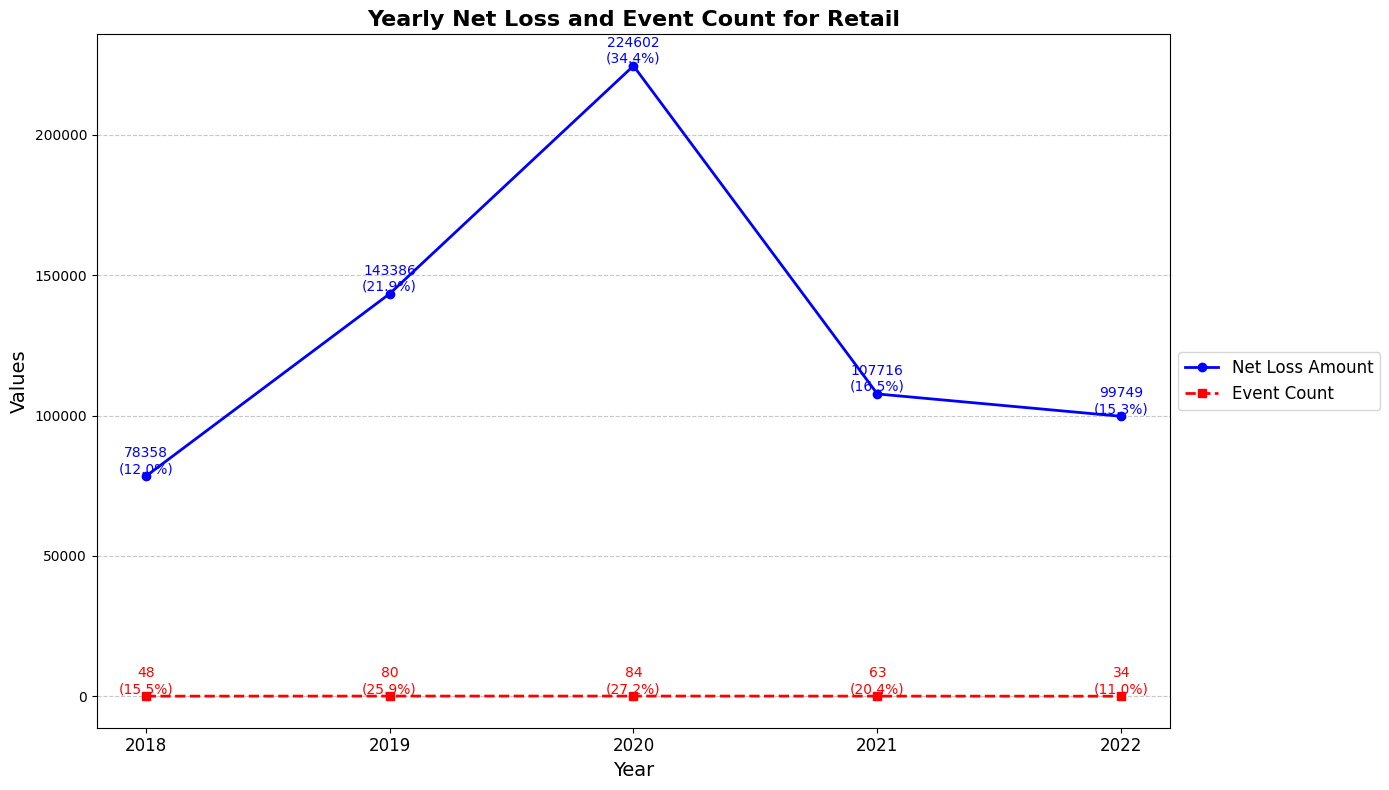

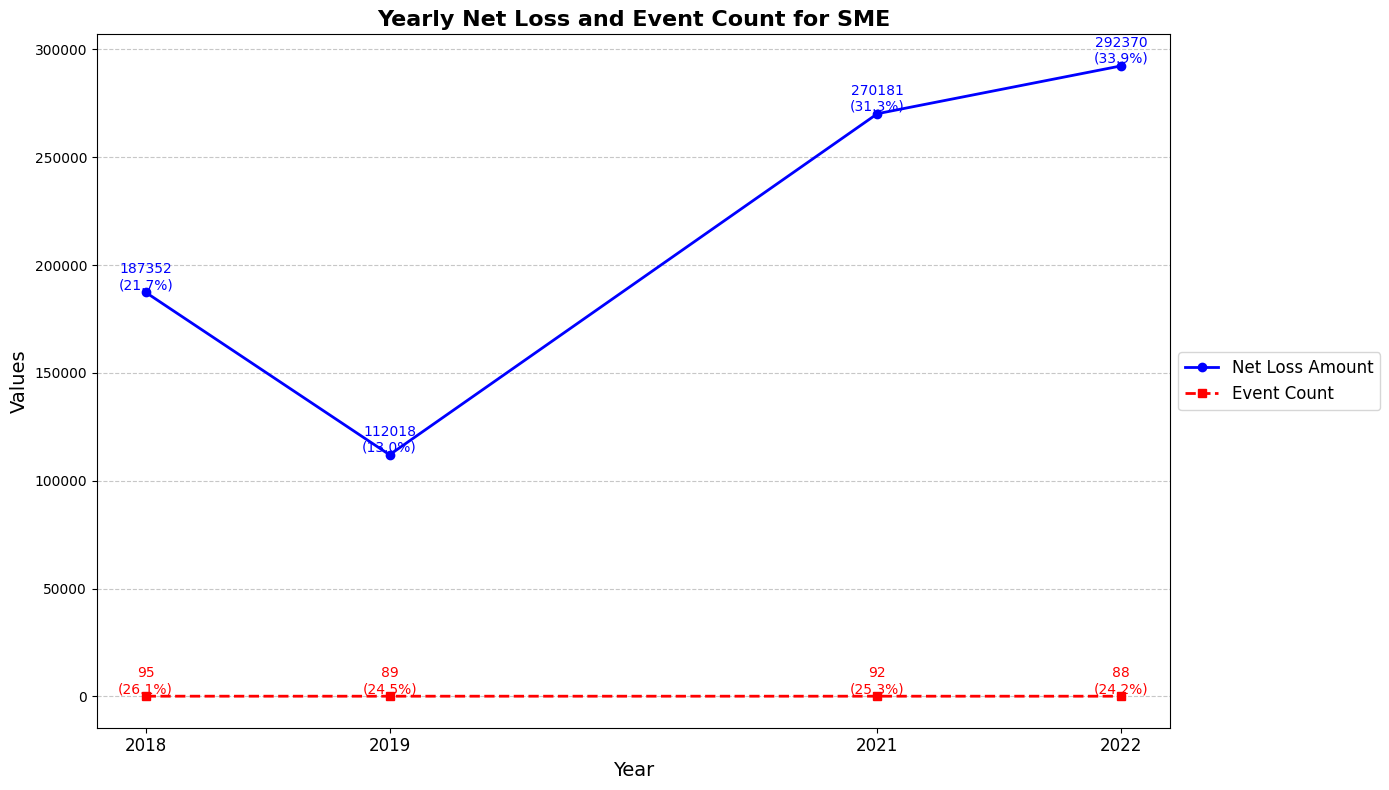

In [16]:

#for all the business line both line chart pernt and value **************
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=60),
    'Event Count': np.random.randint(1, 50, size=60),
    'Net Loss Amount': np.random.randint(1000, 100000, size=60)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and Business Line to calculate total Net Loss and Event Count
grouped_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Calculate total values for percentages
total_net_loss = grouped_data.groupby('Business Line')['Net Loss Amount'].transform('sum')
total_event_count = grouped_data.groupby('Business Line')['Event Count'].transform('sum')
grouped_data['Net Loss Percentage'] = (grouped_data['Net Loss Amount'] / total_net_loss) * 100
grouped_data['Event Count Percentage'] = (grouped_data['Event Count'] / total_event_count) * 100

# Unique Business Lines
business_lines = grouped_data['Business Line'].unique()

# Plotting for each Business Line
for business_line in business_lines:
    # Filter data for the current Business Line
    line_data = grouped_data[grouped_data['Business Line'] == business_line]
    
    # Create the plot
    plt.figure(figsize=(14, 8))

    # Plot Net Loss Amount
    plt.plot(
        line_data['Year'],
        line_data['Net Loss Amount'],
        marker='o',
        linestyle='-',
        linewidth=2,
        label='Net Loss Amount',
        color='blue'
    )

    # Plot Event Count
    plt.plot(
        line_data['Year'],
        line_data['Event Count'],
        marker='s',
        linestyle='--',
        linewidth=2,
        label='Event Count',
        color='red'
    )

    # Add labels for Net Loss and Event Count
    for x, y, pct in zip(line_data['Year'], line_data['Net Loss Amount'], line_data['Net Loss Percentage']):
        plt.text(x, y, f'{y:.0f}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=10, color='blue')

    for x, y, pct in zip(line_data['Year'], line_data['Event Count'], line_data['Event Count Percentage']):
        plt.text(x, y, f'{y:.0f}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=10, color='red')

    # Customize the x-axis
    plt.xticks(line_data['Year'], fontsize=12)  # Ensure proper year labels
    plt.xlabel('Year', fontsize=14)

    # Add labels for the y-axis
    plt.ylabel('Values', fontsize=14)

    # Add a title
    plt.title(f'Yearly Net Loss and Event Count for {business_line}', fontsize=16, fontweight='bold')

    # Add a legend to the right side of the graph
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to fit the legend
    plt.tight_layout()
    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\2793158187.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


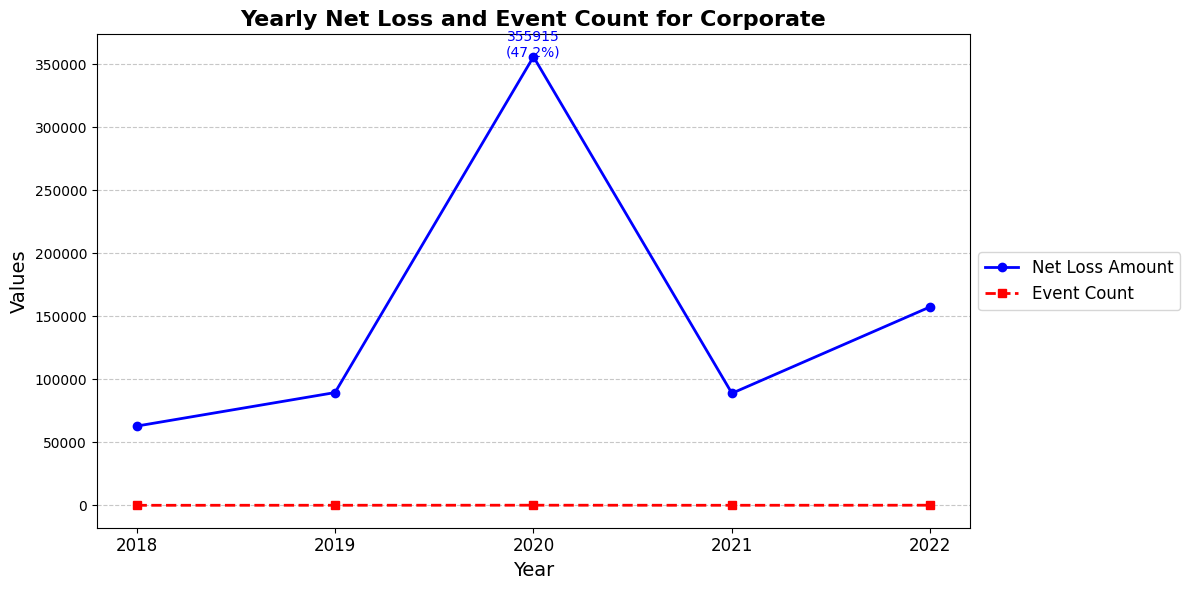

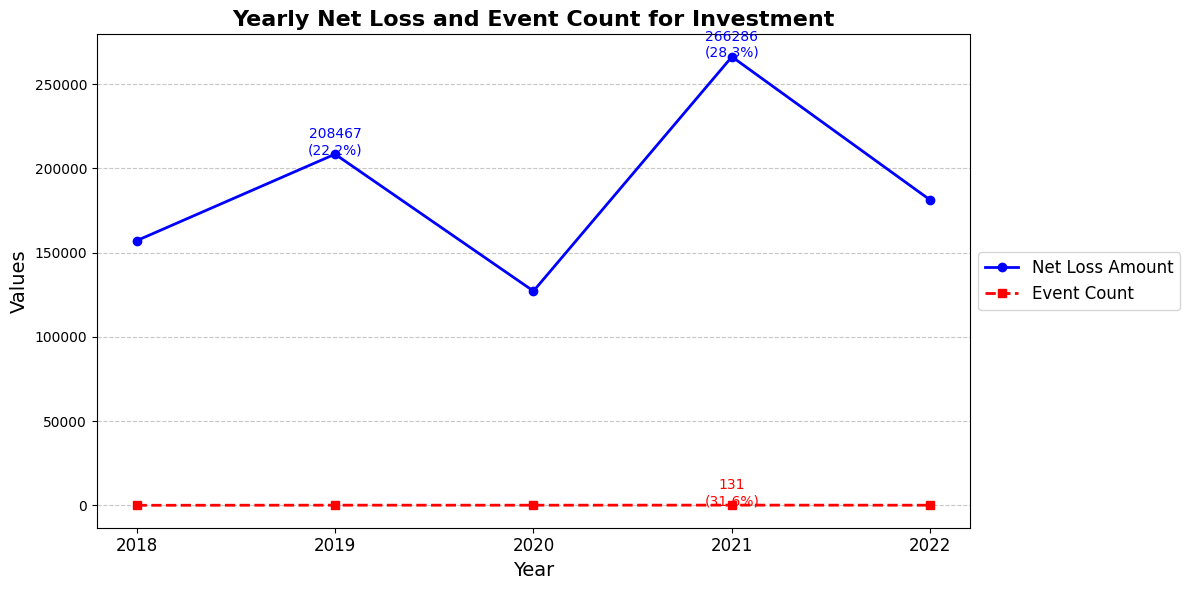

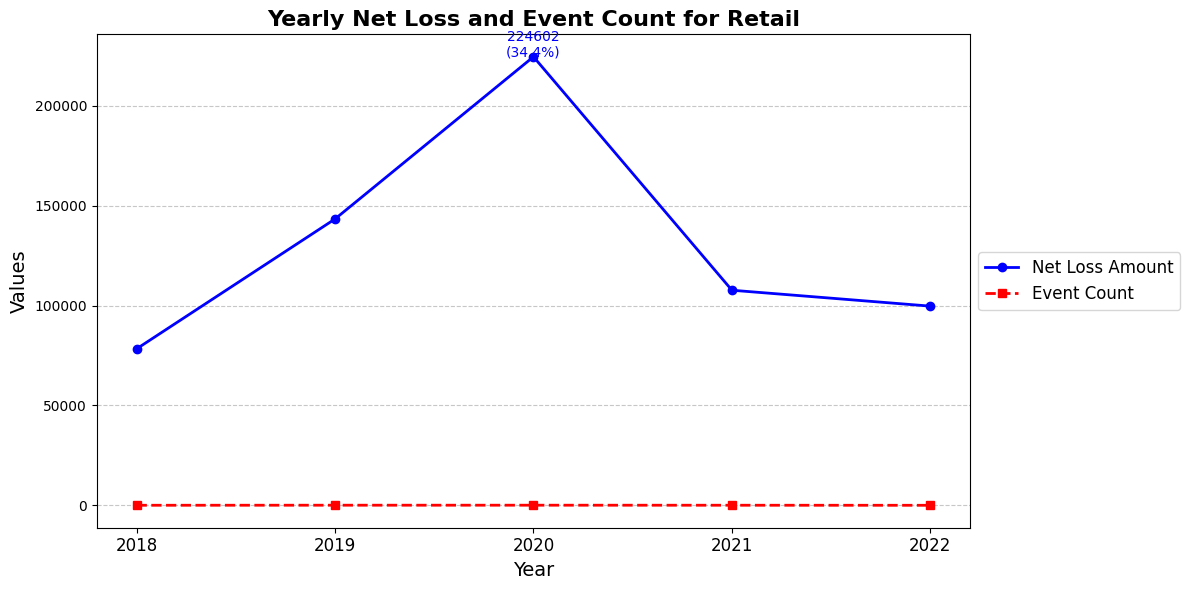

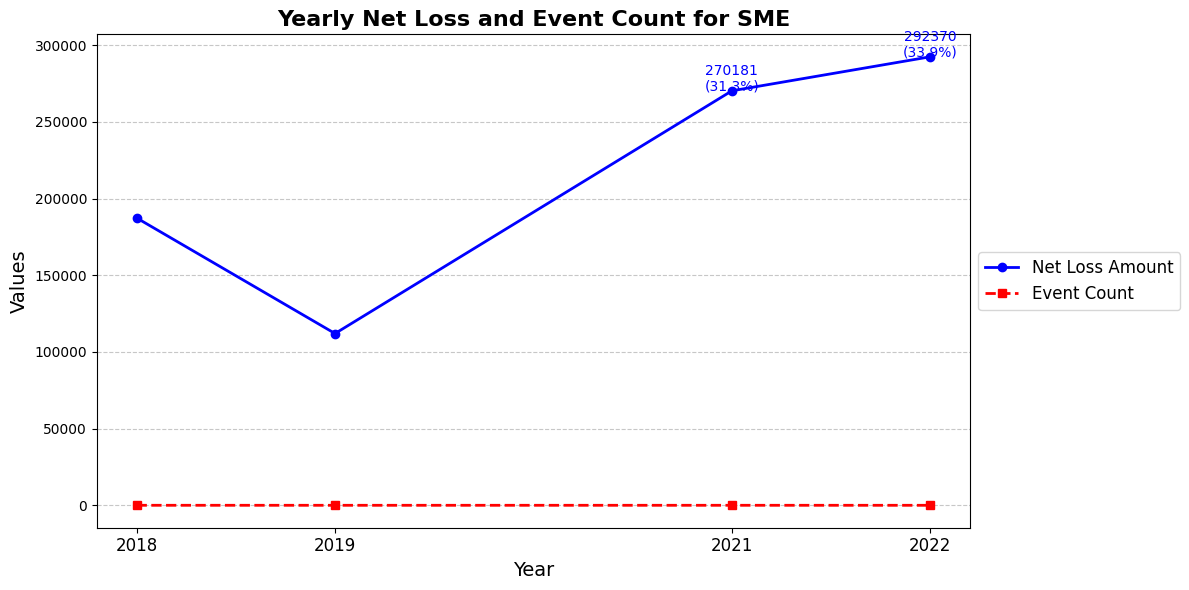

In [17]:
#only for some threshold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=60),
    'Event Count': np.random.randint(1, 50, size=60),
    'Net Loss Amount': np.random.randint(1000, 100000, size=60)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and Business Line to calculate total Net Loss and Event Count
grouped_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Define thresholds
net_loss_threshold = 200000
event_count_threshold = 120

# Unique Business Lines
business_lines = grouped_data['Business Line'].unique()

# Plotting for each Business Line
for business_line in business_lines:
    # Filter data for the current Business Line
    line_data = grouped_data[grouped_data['Business Line'] == business_line]
    
    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot Net Loss Amount
    plt.plot(
        line_data['Year'],
        line_data['Net Loss Amount'],
        marker='o',
        linestyle='-',
        linewidth=2,
        label='Net Loss Amount',
        color='blue'
    )

    # Annotate Net Loss Amount if above the threshold
    for x, y in zip(line_data['Year'], line_data['Net Loss Amount']):
        if y > net_loss_threshold:
            percentage = (y / line_data['Net Loss Amount'].sum()) * 100
            plt.text(
                x, y, f'{y:.0f}\n({percentage:.1f}%)',
                fontsize=10,
                color='blue',
                ha='center'
            )

    # Plot Event Count
    plt.plot(
        line_data['Year'],
        line_data['Event Count'],
        marker='s',
        linestyle='--',
        linewidth=2,
        label='Event Count',
        color='red'
    )

    # Annotate Event Count if above the threshold
    for x, y in zip(line_data['Year'], line_data['Event Count']):
        if y > event_count_threshold:
            percentage = (y / line_data['Event Count'].sum()) * 100
            plt.text(
                x, y, f'{y:.0f}\n({percentage:.1f}%)',
                fontsize=10,
                color='red',
                ha='center'
            )

    # Customize the x-axis
    plt.xticks(line_data['Year'], fontsize=12)  # Ensure proper year labels
    plt.xlabel('Year', fontsize=14)

    # Add labels for the y-axis
    plt.ylabel('Values', fontsize=14)

    # Add a title
    plt.title(f'Yearly Net Loss and Event Count for {business_line}', fontsize=16, fontweight='bold')

    # Add a legend to the right side of the graph
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to fit the legend
    plt.tight_layout()
    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\2808003833.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),


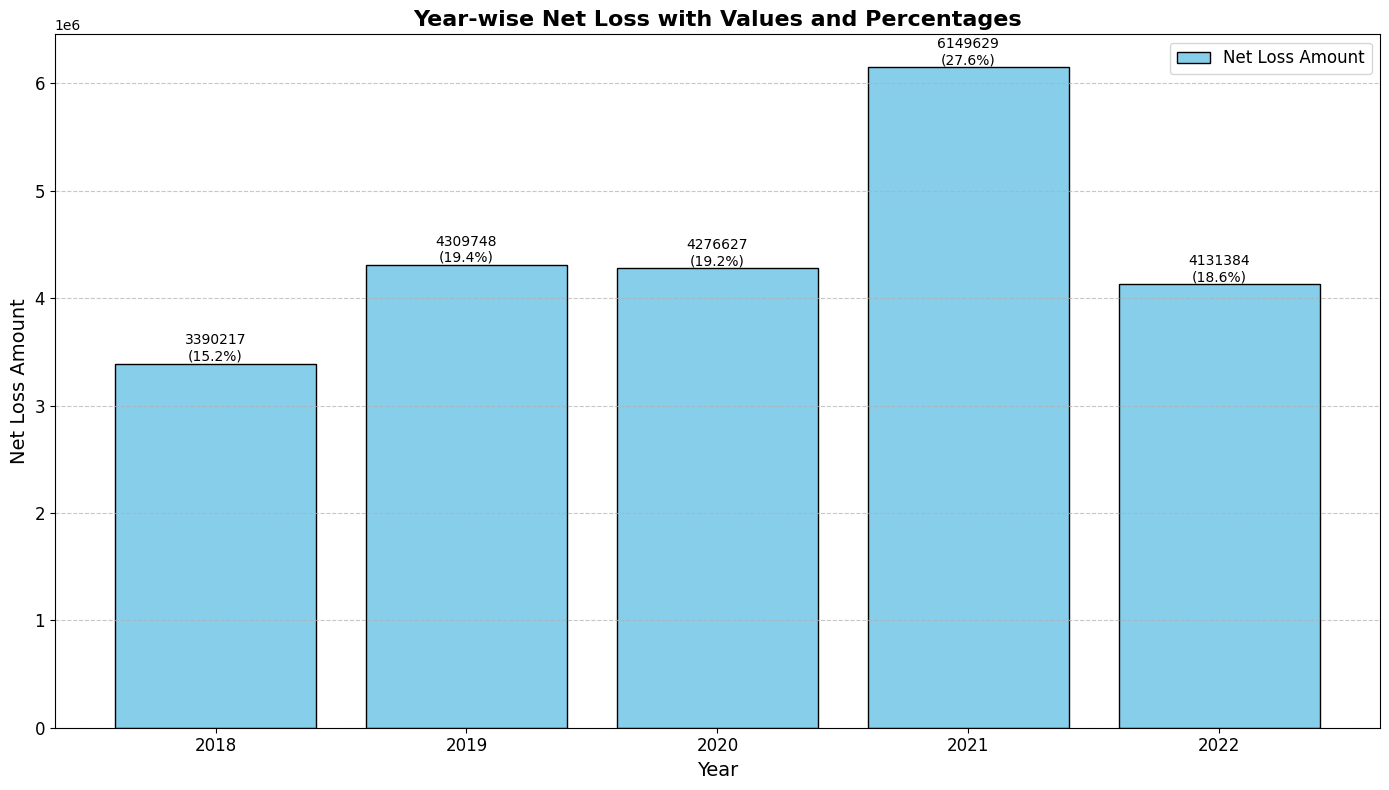

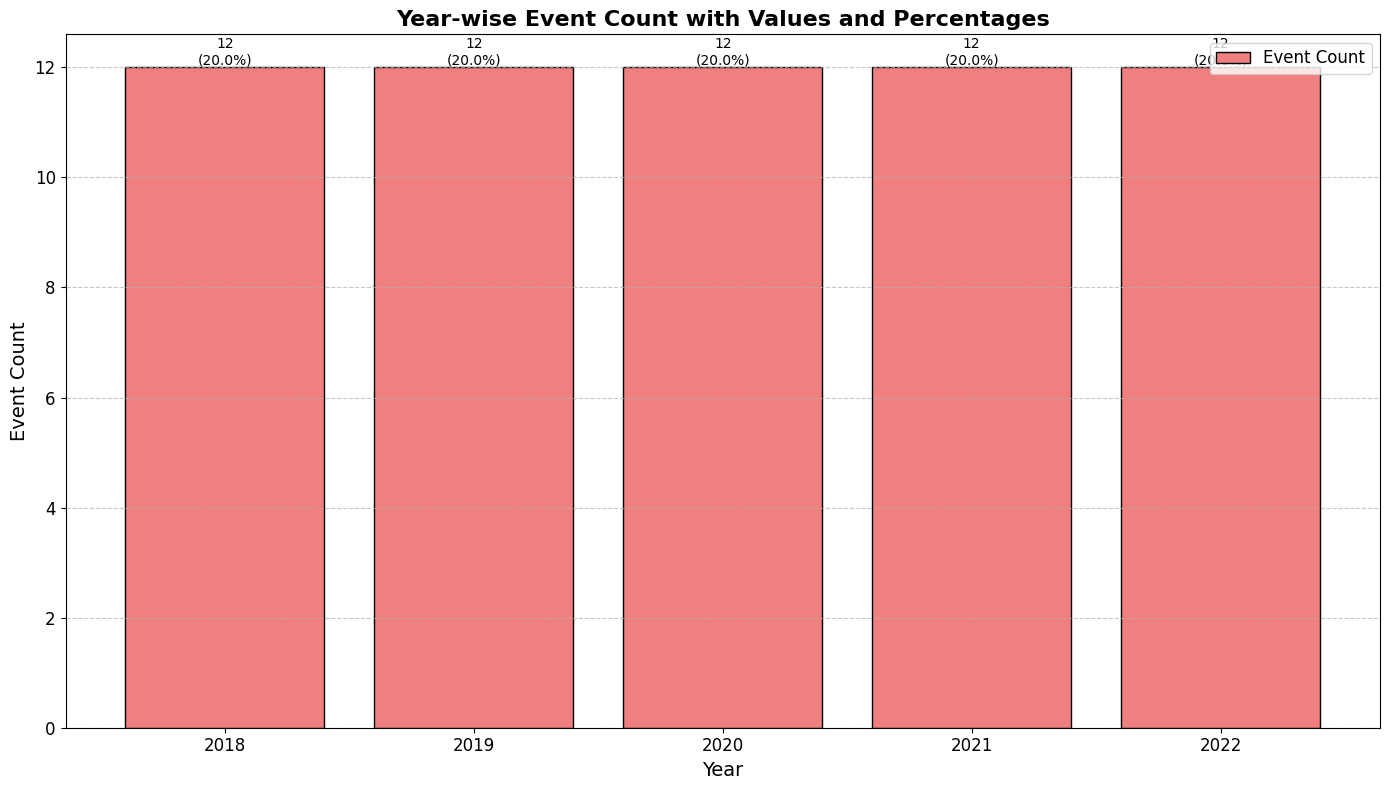

In [18]:

#slide one #percentage and value  yearwise loss and event countg seprate grapgh for both
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Date': pd.date_range(start='2018-01-01', end='2022-12-31', freq='M'),
    'Net Loss Amount': np.random.randint(-100000, 1000000, size=60)
}
df = pd.DataFrame(data)

# Ensure all Net Loss Amounts are positive
df['Net Loss Absolute'] = df['Net Loss Amount'].abs()

# Extract year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and calculate total Net Loss and Event Count
yearly_summary = df.groupby('Year').agg({
    'Net Loss Absolute': 'sum',
    'Date': 'count'  # Event count
}).rename(columns={'Date': 'Event Count'}).reset_index()

# Calculate percentages for Net Loss and Event Count
total_net_loss = yearly_summary['Net Loss Absolute'].sum()
yearly_summary['Net Loss Percentage'] = (yearly_summary['Net Loss Absolute'] / total_net_loss) * 100

total_event_count = yearly_summary['Event Count'].sum()
yearly_summary['Event Count Percentage'] = (yearly_summary['Event Count'] / total_event_count) * 100

# --- Bar Chart for Net Loss ---
plt.figure(figsize=(14, 8))
bars = plt.bar(
    yearly_summary['Year'].astype(str),
    yearly_summary['Net Loss Absolute'],
    color='skyblue',
    edgecolor='black',
    label='Net Loss Amount'
)

# Add labels to each bar (Net Loss Value and Percentage)
for bar, value, percentage in zip(bars, yearly_summary['Net Loss Absolute'], yearly_summary['Net Loss Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.0f}\n({percentage:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Year-wise Net Loss with Values and Percentages', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Loss Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Bar Chart for Event Count ---
plt.figure(figsize=(14, 8))
bars = plt.bar(
    yearly_summary['Year'].astype(str),
    yearly_summary['Event Count'],
    color='lightcoral',
    edgecolor='black',
    label='Event Count'
)

# Add labels to each bar (Event Count Value and Percentage)
for bar, value, percentage in zip(bars, yearly_summary['Event Count'], yearly_summary['Event Count Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.0f}\n({percentage:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Year-wise Event Count with Values and Percentages', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Event Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
#only counts line chart

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_8340\3743551710.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


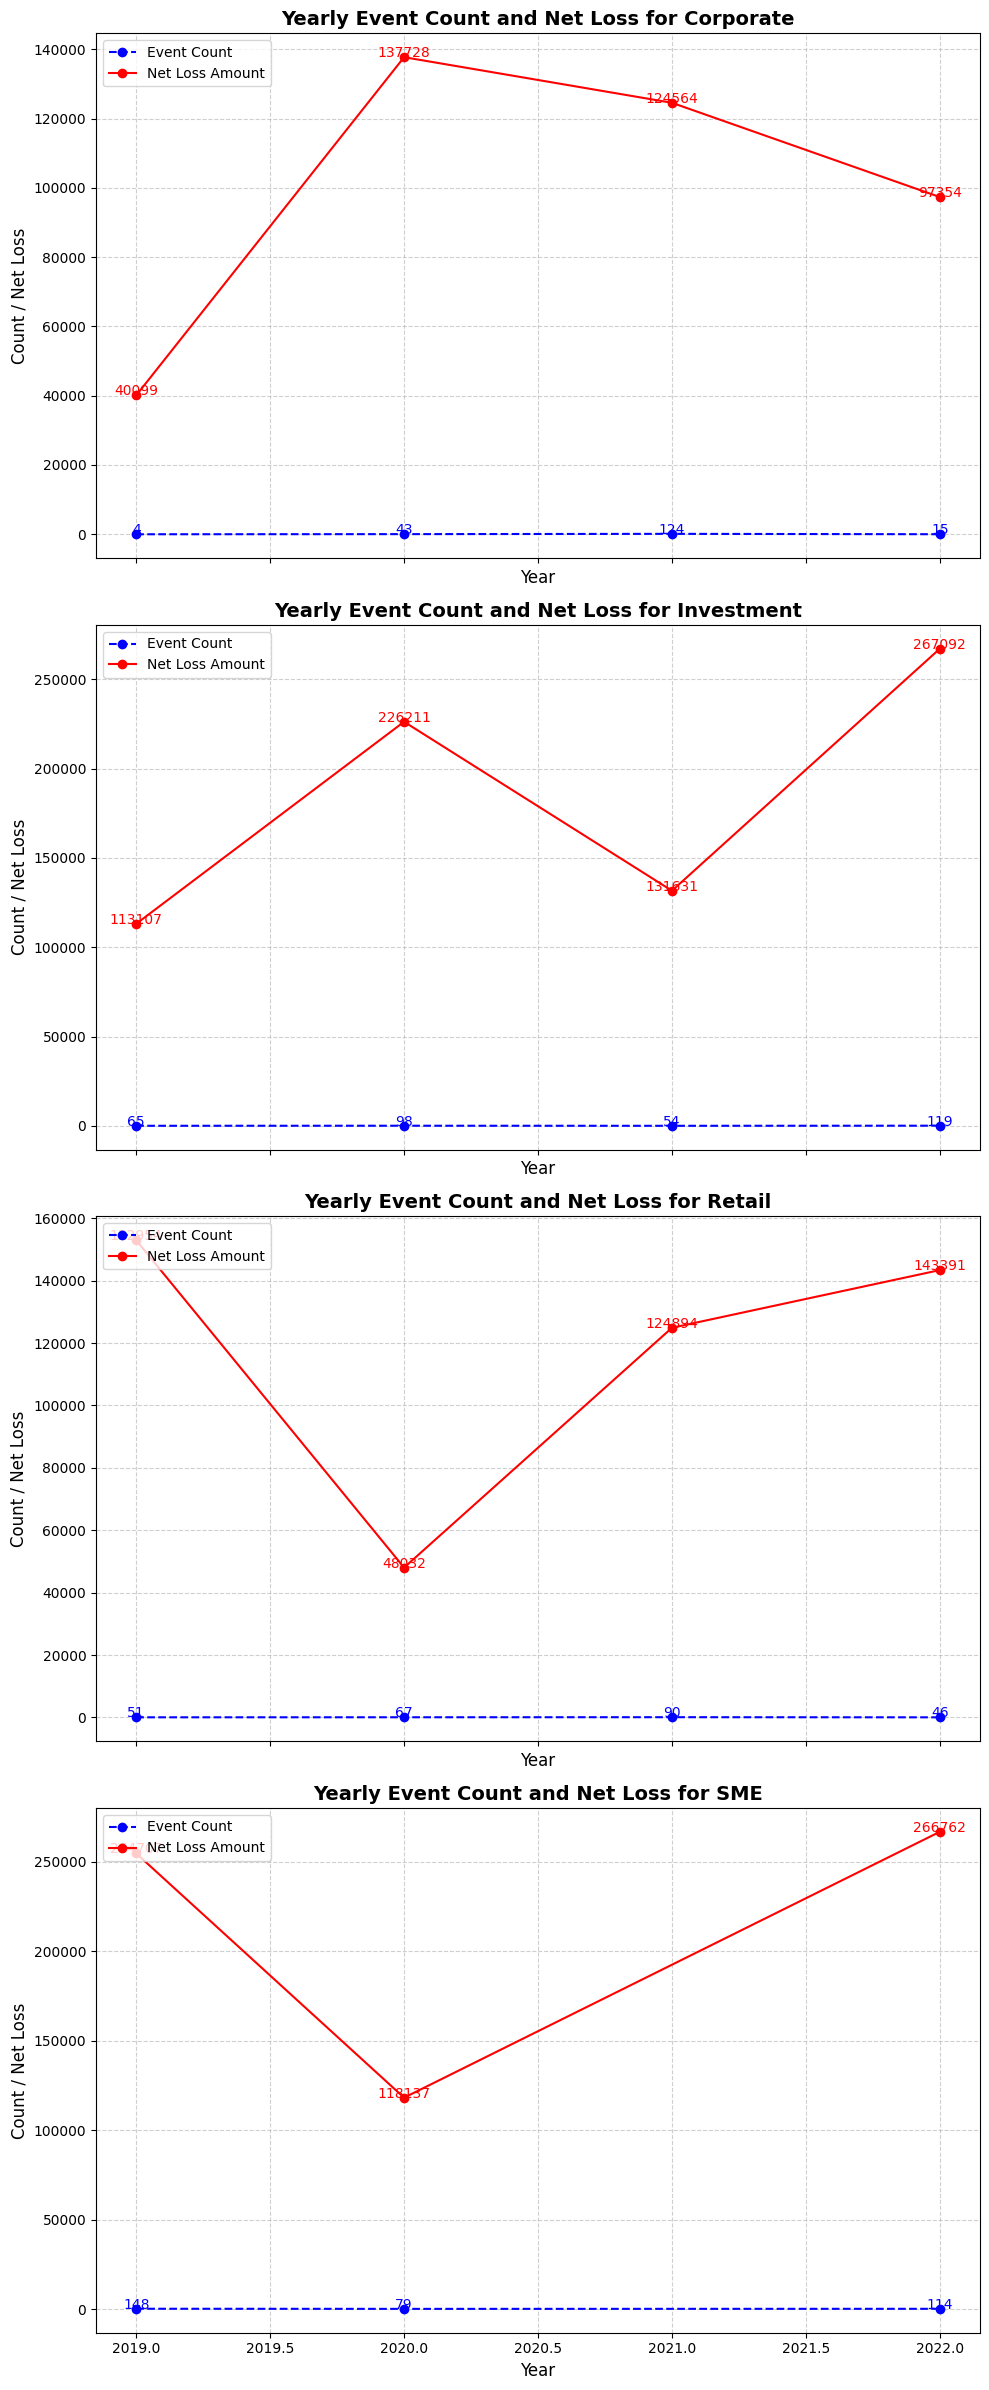

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate', 'SME', 'Investment'], size=48),
    'Event Count': np.random.randint(1, 50, size=48),
    'Net Loss Amount': np.random.randint(1000, 100000, size=48)
}
df = pd.DataFrame(data)

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Business Line and Year, and aggregate totals
yearly_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Get unique business lines for creating subplots
business_lines = yearly_data['Business Line'].unique()

# Set up subplots
fig, axes = plt.subplots(len(business_lines), 1, figsize=(10, 6 * len(business_lines)), sharex=True)

# Iterate through each business line and plot
for idx, business_line in enumerate(business_lines):
    ax = axes[idx]
    data = yearly_data[yearly_data['Business Line'] == business_line]
    
    # Plot Event Count
    ax.plot(
        data['Year'], data['Event Count'], marker='o', label='Event Count', color='blue', linestyle='--'
    )
    for x, y in zip(data['Year'], data['Event Count']):
        ax.text(x, y, f"{y}", color='blue', fontsize=10, ha='center')
    
    # Plot Net Loss
    ax.plot(
        data['Year'], data['Net Loss Amount'], marker='o', label='Net Loss Amount', color='red', linestyle='-'
    )
    for x, y in zip(data['Year'], data['Net Loss Amount']):
        ax.text(x, y, f"{y:.0f}", color='red', fontsize=10, ha='center')
    
    # Add titles and legends
    ax.set_title(f"Yearly Event Count and Net Loss for {business_line}", fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Count / Net Loss', fontsize=12)
    ax.legend(fontsize=10, loc='upper left')
    ax.grid(axis='both', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()
